In [1]:
# Loading sklearn libraries

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [128]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.preprocessing import LabelEncoder

# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# import defined functions
from ALY6140_Capstone_Group_5 import plot_data_distribution,plot_pairplot,plot_correlation_heatmap,plot_confusion_matrix

# import Statistical tests
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [5]:
#Read data
df_CarPollution= pd.read_csv("MY2012-2022_Dataset.csv")

In [6]:
df_CarPollution.tail()

MODEL_YEAR   MAKE        MODEL  VEHICLE_CLASS  ENGINE_SIZE(L)  \
11582        2022  Volvo  XC40 T5 AWD     SUV: Small             2.0   
11583        2022  Volvo  XC60 B5 AWD     SUV: Small             2.0   
11584        2022  Volvo  XC60 B6 AWD     SUV: Small             2.0   
11585        2022  Volvo  XC90 T5 AWD  SUV: Standard             2.0   
11586        2022  Volvo  XC90 T6 AWD  SUV: Standard             2.0   

       CYLINDERS TRANSMISSION FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
11582          4          AS8        Z                               10.7   
11583          4          AS8        Z                               10.5   
11584          4          AS8        Z                               11.0   
11585          4          AS8        Z                               11.5   
11586          4          AS8        Z                               12.4   

       FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
11582                               7.7                                9.4   
11583                               8.1                                9.4   
11584                               8.7                                9.9   
11585                               8.4                               10.1   
11586                               8.9                               10.8   

       FUEL_CONSUMPTION_COMB_MPG  CO2_EMISSIONS_G_KM   CO2_Rating  Smog_Rating  
11582                         30                  219         5.0          5.0  
11583                         30                  219         5.0          5.0  
11584                         29                  232         5.0          7.0  
11585                         28                  236         5.0          5.0  
11586                         26                  252         5.0          7.0

# Data Analysis - Start

In [7]:
df_CarPollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11587 entries, 0 to 11586
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MODEL_YEAR                         11587 non-null  int64  
 1   MAKE                               11587 non-null  object 
 2   MODEL                              11587 non-null  object 
 3   VEHICLE_CLASS                      11587 non-null  object 
 4   ENGINE_SIZE(L)                     11587 non-null  float64
 5   CYLINDERS                          11587 non-null  int64  
 6   TRANSMISSION                       11587 non-null  object 
 7   FUELTYPE                           11587 non-null  object 
 8   FUEL_CONSUMPTION_CITY_L_Per_100KM  11587 non-null  float64
 9   FUEL_CONSUMPTION_HWY_L_Per_100KM   11587 non-null  float64
 10  FUEL_CONSUMPTION_COMB_L_Per_100KM  11587 non-null  float64
 11  FUEL_CONSUMPTION_COMB_MPG          11587 non-null  int

In [8]:
df_CarPollution.shape

(11587, 15)

In [9]:
df_CarPollution.dtypes

MODEL_YEAR                             int64
MAKE                                  object
MODEL                                 object
VEHICLE_CLASS                         object
ENGINE_SIZE(L)                       float64
CYLINDERS                              int64
TRANSMISSION                          object
FUELTYPE                              object
FUEL_CONSUMPTION_CITY_L_Per_100KM    float64
FUEL_CONSUMPTION_HWY_L_Per_100KM     float64
FUEL_CONSUMPTION_COMB_L_Per_100KM    float64
FUEL_CONSUMPTION_COMB_MPG              int64
CO2_EMISSIONS_G_KM                     int64
CO2_Rating                           float64
Smog_Rating                          float64
dtype: object

In [10]:
df_CarPollution.describe().transpose()

count         mean        std     min  \
MODEL_YEAR                         11587.0  2016.864072   3.126137  2012.0   
ENGINE_SIZE(L)                     11587.0     3.230595   1.376070     0.9   
CYLINDERS                          11587.0     5.697074   1.867498     3.0   
FUEL_CONSUMPTION_CITY_L_Per_100KM  11587.0    12.804108   3.698600     4.0   
FUEL_CONSUMPTION_HWY_L_Per_100KM   11587.0     9.260991   2.394108     3.9   
FUEL_CONSUMPTION_COMB_L_Per_100KM  11587.0    11.209761   3.075801     4.0   
FUEL_CONSUMPTION_COMB_MPG          11587.0    27.026323   7.335308    11.0   
CO2_EMISSIONS_G_KM                 11587.0   255.098731  61.319497    94.0   
CO2_Rating                          7211.0     4.655110   1.637429     1.0   
Smog_Rating                         6101.0     4.681036   1.794404     1.0   

                                      25%     50%     75%     max  
MODEL_YEAR                         2014.0  2017.0  2020.0  2022.0  
ENGINE_SIZE(L)                        2.0     3.0     3.8     8.4  
CYLINDERS                             4.0     6.0     6.0    16.0  
FUEL_CONSUMPTION_CITY_L_Per_100KM    10.2    12.3    14.8    30.6  
FUEL_CONSUMPTION_HWY_L_Per_100KM      7.6     8.9    10.4    20.9  
FUEL_CONSUMPTION_COMB_L_Per_100KM     9.1    10.7    12.8    26.1  
FUEL_CONSUMPTION_COMB_MPG            22.0    26.0    31.0    71.0  
CO2_EMISSIONS_G_KM                  211.0   250.0   293.0   608.0  
CO2_Rating                            4.0     5.0     6.0    10.0  
Smog_Rating                           3.0     5.0     6.0     8.0

In [11]:
df_CarPollution['CO2_Rating'].unique()

array([nan,  7.,  5.,  2.,  3.,  6.,  4.,  8.,  1.,  9., 10.])

# Featurization  

In [12]:
#Check Null Values

#There are NANs in CO2_Rating column, this is because the source data wasn't populate for older years.
# The logic to generate this column is shared by EPA https://www.epa.gov/greenvehicles/greenhouse-gas-rating
# We have used the logic there to impute missing values.
df_CarPollution.isnull().sum()

MODEL_YEAR                              0
MAKE                                    0
MODEL                                   0
VEHICLE_CLASS                           0
ENGINE_SIZE(L)                          0
CYLINDERS                               0
TRANSMISSION                            0
FUELTYPE                                0
FUEL_CONSUMPTION_CITY_L_Per_100KM       0
FUEL_CONSUMPTION_HWY_L_Per_100KM        0
FUEL_CONSUMPTION_COMB_L_Per_100KM       0
FUEL_CONSUMPTION_COMB_MPG               0
CO2_EMISSIONS_G_KM                      0
CO2_Rating                           4376
Smog_Rating                          5486
dtype: int64

In [13]:
df_CarPollution.rename({'CO2_EMISSIONS_G_KM ': 'CO2_EMISSIONS_G_KM'}, axis=1, inplace=True)

In [14]:
df_CarPollution['MODEL_YEAR'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [15]:
#Fill the empty CO2 rating by the CO2 emissions given
#Split data based on CO2 rating levels

df2012 = df_CarPollution[(df_CarPollution['MODEL_YEAR'] == 2012)]
df2013 = df_CarPollution[(df_CarPollution['MODEL_YEAR'] == 2013)]
df2014 = df_CarPollution[(df_CarPollution['MODEL_YEAR'] == 2014)]
df2015 = df_CarPollution[(df_CarPollution['MODEL_YEAR'] == 2015)]

In [16]:
# Business logic to impute 2012 CO2 ratings

df2012["CO2_EMISSIONS_G_MILE"] = (df2012["CO2_EMISSIONS_G_KM"] * 1.60934)

df2012['CO2_Rating'].mask(df2012['CO2_EMISSIONS_G_MILE'] < 188, 10, inplace=True)
df2012['CO2_Rating'].mask((df2012['CO2_EMISSIONS_G_MILE'] >= 188) & (df2012['CO2_EMISSIONS_G_MILE'] < 234), 9, inplace=True)
df2012['CO2_Rating'].mask((df2012['CO2_EMISSIONS_G_MILE'] >= 234) & (df2012['CO2_EMISSIONS_G_MILE'] < 280), 8, inplace=True)
df2012['CO2_Rating'].mask((df2012['CO2_EMISSIONS_G_MILE'] >= 280) & (df2012['CO2_EMISSIONS_G_MILE'] < 326), 7, inplace=True)
df2012['CO2_Rating'].mask((df2012['CO2_EMISSIONS_G_MILE'] >= 326) & (df2012['CO2_EMISSIONS_G_MILE'] < 372), 6, inplace=True)
df2012['CO2_Rating'].mask((df2012['CO2_EMISSIONS_G_MILE'] >= 372) & (df2012['CO2_EMISSIONS_G_MILE'] < 418), 5, inplace=True)
df2012['CO2_Rating'].mask((df2012['CO2_EMISSIONS_G_MILE'] >= 418) & (df2012['CO2_EMISSIONS_G_MILE'] < 464), 4, inplace=True)
df2012['CO2_Rating'].mask((df2012['CO2_EMISSIONS_G_MILE'] >= 464) & (df2012['CO2_EMISSIONS_G_MILE'] < 510), 3, inplace=True)
df2012['CO2_Rating'].mask((df2012['CO2_EMISSIONS_G_MILE'] >= 510) & (df2012['CO2_EMISSIONS_G_MILE'] < 556), 2, inplace=True)
df2012['CO2_Rating'].mask(df2012['CO2_EMISSIONS_G_MILE'] >= 556, 1, inplace=True)
df2012.head()

MODEL_YEAR   MAKE          MODEL VEHICLE_CLASS  ENGINE_SIZE(L)  CYLINDERS  \
0        2012  ACURA        MDX AWD           SUV             3.7          6   
1        2012  ACURA  RDX AWD TURBO           SUV             2.3          4   
2        2012  ACURA         RL AWD      MID-SIZE             3.7          6   
3        2012  ACURA             TL      MID-SIZE             3.5          6   
4        2012  ACURA         TL AWD      MID-SIZE             3.7          6   

  TRANSMISSION FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
0          AS6        Z                               14.8   
1          AS5        Z                               13.2   
2          AS6        Z                               13.7   
3          AS6        Z                               11.8   
4          AS6        Z                               12.9   

   FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
0                              11.3                               13.2   
1                              10.3                               11.9   
2                               9.7                               11.9   
3                               8.1                               10.1   
4                               9.0                               11.1   

   FUEL_CONSUMPTION_COMB_MPG  CO2_EMISSIONS_G_KM  CO2_Rating  Smog_Rating  \
0                         21                 304         3.0          NaN   
1                         24                 274         4.0          NaN   
2                         24                 274         4.0          NaN   
3                         28                 232         5.0          NaN   
4                         25                 255         5.0          NaN   

   CO2_EMISSIONS_G_MILE  
0             489.23936  
1             440.95916  
2             440.95916  
3             373.36688  
4             410.38170

In [17]:
# Business logic to impute 2013 CO2 ratings

df2013["CO2_EMISSIONS_G_MILE"] = (df2013["CO2_EMISSIONS_G_KM"] * 1.60934)

df2013['CO2_Rating'].mask(df2013['CO2_EMISSIONS_G_MILE'] < 223, 10, inplace=True)
df2013['CO2_Rating'].mask((df2013['CO2_EMISSIONS_G_MILE'] >= 223) & (df2013['CO2_EMISSIONS_G_MILE'] < 262), 9, inplace=True)
df2013['CO2_Rating'].mask((df2013['CO2_EMISSIONS_G_MILE'] >= 262) & (df2013['CO2_EMISSIONS_G_MILE'] < 307), 8, inplace=True)
df2013['CO2_Rating'].mask((df2013['CO2_EMISSIONS_G_MILE'] >= 307) & (df2013['CO2_EMISSIONS_G_MILE'] < 343), 7, inplace=True)
df2013['CO2_Rating'].mask((df2013['CO2_EMISSIONS_G_MILE'] >= 343) & (df2013['CO2_EMISSIONS_G_MILE'] < 387), 6, inplace=True)
df2013['CO2_Rating'].mask((df2013['CO2_EMISSIONS_G_MILE'] >= 387) & (df2013['CO2_EMISSIONS_G_MILE'] < 445), 5, inplace=True)
df2013['CO2_Rating'].mask((df2013['CO2_EMISSIONS_G_MILE'] >= 445) & (df2013['CO2_EMISSIONS_G_MILE'] < 524), 4, inplace=True)
df2013['CO2_Rating'].mask((df2013['CO2_EMISSIONS_G_MILE'] >= 524) & (df2013['CO2_EMISSIONS_G_MILE'] < 593), 3, inplace=True)
df2013['CO2_Rating'].mask((df2013['CO2_EMISSIONS_G_MILE'] >= 593) & (df2013['CO2_EMISSIONS_G_MILE'] < 685), 2, inplace=True)
df2013['CO2_Rating'].mask(df2013['CO2_EMISSIONS_G_MILE'] >= 685, 1, inplace=True)

df2013.head()

MODEL_YEAR   MAKE       MODEL VEHICLE_CLASS  ENGINE_SIZE(L)  CYLINDERS  \
1091        2013  ACURA         ILX       COMPACT             2.0          4   
1092        2013  ACURA         ILX       COMPACT             2.4          4   
1093        2013  ACURA  ILX HYBRID       COMPACT             1.5          4   
1094        2013  ACURA     MDX AWD   SUV - SMALL             3.7          6   
1095        2013  ACURA     RDX AWD   SUV - SMALL             3.5          6   

     TRANSMISSION FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
1091          AS5        Z                                9.9   
1092           M6        Z                               11.2   
1093          AV7        Z                                6.1   
1094          AS6        Z                               14.8   
1095          AS6        Z                               12.1   

      FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
1091                               6.7                                8.5   
1092                               7.8                                9.6   
1093                               5.8                                6.0   
1094                              11.3                               13.2   
1095                               8.7                               10.6   

      FUEL_CONSUMPTION_COMB_MPG  CO2_EMISSIONS_G_KM  CO2_Rating  Smog_Rating  \
1091                         33                 196         7.0          NaN   
1092                         29                 221         6.0          NaN   
1093                         47                 138        10.0          NaN   
1094                         21                 304         4.0          NaN   
1095                         27                 244         5.0          NaN   

      CO2_EMISSIONS_G_MILE  
1091             315.43064  
1092             355.66414  
1093             222.08892  
1094             489.23936  
1095             392.67896

In [18]:
# Business logic to impute 2014 CO2 ratings

df2014["CO2_EMISSIONS_G_MILE"] = (df2014["CO2_EMISSIONS_G_KM"] * 1.60934)

df2014['CO2_Rating'].mask(df2014['CO2_EMISSIONS_G_MILE'] < 210, 10, inplace=True)
df2014['CO2_Rating'].mask((df2014['CO2_EMISSIONS_G_MILE'] >= 210) & (df2014['CO2_EMISSIONS_G_MILE'] < 259), 9, inplace=True)
df2014['CO2_Rating'].mask((df2014['CO2_EMISSIONS_G_MILE'] >= 259) & (df2014['CO2_EMISSIONS_G_MILE'] < 302), 8, inplace=True)
df2014['CO2_Rating'].mask((df2014['CO2_EMISSIONS_G_MILE'] >= 302) & (df2014['CO2_EMISSIONS_G_MILE'] < 350), 7, inplace=True)
df2014['CO2_Rating'].mask((df2014['CO2_EMISSIONS_G_MILE'] >= 350) & (df2014['CO2_EMISSIONS_G_MILE'] < 396), 6, inplace=True)
df2014['CO2_Rating'].mask((df2014['CO2_EMISSIONS_G_MILE'] >= 396) & (df2014['CO2_EMISSIONS_G_MILE'] < 457), 5, inplace=True)
df2014['CO2_Rating'].mask((df2014['CO2_EMISSIONS_G_MILE'] >= 457) & (df2014['CO2_EMISSIONS_G_MILE'] < 509), 4, inplace=True)
df2014['CO2_Rating'].mask((df2014['CO2_EMISSIONS_G_MILE'] >= 509) & (df2014['CO2_EMISSIONS_G_MILE'] < 574), 3, inplace=True)
df2014['CO2_Rating'].mask((df2014['CO2_EMISSIONS_G_MILE'] >= 574) & (df2014['CO2_EMISSIONS_G_MILE'] < 659), 2, inplace=True)
df2014['CO2_Rating'].mask(df2014['CO2_EMISSIONS_G_MILE'] >= 659, 1, inplace=True)

df2014.head()

MODEL_YEAR   MAKE       MODEL VEHICLE_CLASS  ENGINE_SIZE(L)  CYLINDERS  \
2173        2014  ACURA         ILX       COMPACT             2.0          4   
2174        2014  ACURA         ILX       COMPACT             2.4          4   
2175        2014  ACURA  ILX HYBRID       COMPACT             1.5          4   
2176        2014  ACURA     MDX 4WD   SUV - SMALL             3.5          6   
2177        2014  ACURA     RDX AWD   SUV - SMALL             3.5          6   

     TRANSMISSION FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
2173          AS5        Z                                9.9   
2174           M6        Z                               11.2   
2175          AV7        Z                                6.0   
2176          AS6        Z                               12.7   
2177          AS6        Z                               12.1   

      FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
2173                               6.7                                8.5   
2174                               7.7                                9.6   
2175                               5.8                                5.9   
2176                               9.1                               11.1   
2177                               8.7                               10.6   

      FUEL_CONSUMPTION_COMB_MPG  CO2_EMISSIONS_G_KM  CO2_Rating  Smog_Rating  \
2173                         33                 196         7.0          NaN   
2174                         29                 221         6.0          NaN   
2175                         48                 136         9.0          NaN   
2176                         25                 255         5.0          NaN   
2177                         27                 244         6.0          NaN   

      CO2_EMISSIONS_G_MILE  
2173             315.43064  
2174             355.66414  
2175             218.87024  
2176             410.38170  
2177             392.67896

In [19]:
# Business logic to impute 2015 CO2 ratings

df2015["CO2_EMISSIONS_G_MILE"] = (df2015["CO2_EMISSIONS_G_KM"] * 1.60934)

df2015['CO2_Rating'].mask(df2015['CO2_EMISSIONS_G_MILE'] < 201, 10, inplace=True)
df2015['CO2_Rating'].mask((df2015['CO2_EMISSIONS_G_MILE'] >= 201) & (df2015['CO2_EMISSIONS_G_MILE'] < 244), 9, inplace=True)
df2015['CO2_Rating'].mask((df2015['CO2_EMISSIONS_G_MILE'] >= 244) & (df2015['CO2_EMISSIONS_G_MILE'] < 292), 8, inplace=True)
df2015['CO2_Rating'].mask((df2015['CO2_EMISSIONS_G_MILE'] >= 292) & (df2015['CO2_EMISSIONS_G_MILE'] < 336), 7, inplace=True)
df2015['CO2_Rating'].mask((df2015['CO2_EMISSIONS_G_MILE'] >= 336) & (df2015['CO2_EMISSIONS_G_MILE'] < 379), 6, inplace=True)
df2015['CO2_Rating'].mask((df2015['CO2_EMISSIONS_G_MILE'] >= 379) & (df2015['CO2_EMISSIONS_G_MILE'] < 457), 5, inplace=True)
df2015['CO2_Rating'].mask((df2015['CO2_EMISSIONS_G_MILE'] >= 457) & (df2015['CO2_EMISSIONS_G_MILE'] < 540), 4, inplace=True)
df2015['CO2_Rating'].mask((df2015['CO2_EMISSIONS_G_MILE'] >= 540) & (df2015['CO2_EMISSIONS_G_MILE'] < 614), 3, inplace=True)
df2015['CO2_Rating'].mask((df2015['CO2_EMISSIONS_G_MILE'] >= 614) & (df2015['CO2_EMISSIONS_G_MILE'] < 659), 2, inplace=True)
df2015['CO2_Rating'].mask(df2015['CO2_EMISSIONS_G_MILE'] >= 659, 1, inplace=True)

df2015.head()

MODEL_YEAR   MAKE       MODEL VEHICLE_CLASS  ENGINE_SIZE(L)  CYLINDERS  \
3244        2015  ACURA         ILX       COMPACT             2.0          4   
3245        2015  ACURA         ILX       COMPACT             2.4          4   
3246        2015  ACURA  ILX HYBRID       COMPACT             1.5          4   
3247        2015  ACURA  MDX SH-AWD   SUV - SMALL             3.5          6   
3248        2015  ACURA     RDX AWD   SUV - SMALL             3.5          6   

     TRANSMISSION FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
3244          AS5        Z                                9.7   
3245           M6        Z                               10.8   
3246          AV7        Z                                6.0   
3247          AS6        Z                               12.7   
3248          AS6        Z                               12.1   

      FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
3244                               6.7                                8.3   
3245                               7.4                                9.3   
3246                               6.1                                6.1   
3247                               9.1                               11.1   
3248                               8.7                               10.6   

      FUEL_CONSUMPTION_COMB_MPG  CO2_EMISSIONS_G_KM  CO2_Rating  Smog_Rating  \
3244                         34                 191         7.0          NaN   
3245                         30                 214         6.0          NaN   
3246                         46                 140         9.0          NaN   
3247                         25                 255         5.0          NaN   
3248                         27                 244         5.0          NaN   

      CO2_EMISSIONS_G_MILE  
3244             307.38394  
3245             344.39876  
3246             225.30760  
3247             410.38170  
3248             392.67896

In [20]:
#Combine all the imputed dataframe together
df2012_to_2015 = pd.concat([df2012, df2013, df2014, df2015], ignore_index = True)
df2012_to_2015 = df2012_to_2015.drop(['CO2_EMISSIONS_G_MILE'], axis = 1)
df2012_to_2015.head()

MODEL_YEAR   MAKE          MODEL VEHICLE_CLASS  ENGINE_SIZE(L)  CYLINDERS  \
0        2012  ACURA        MDX AWD           SUV             3.7          6   
1        2012  ACURA  RDX AWD TURBO           SUV             2.3          4   
2        2012  ACURA         RL AWD      MID-SIZE             3.7          6   
3        2012  ACURA             TL      MID-SIZE             3.5          6   
4        2012  ACURA         TL AWD      MID-SIZE             3.7          6   

  TRANSMISSION FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
0          AS6        Z                               14.8   
1          AS5        Z                               13.2   
2          AS6        Z                               13.7   
3          AS6        Z                               11.8   
4          AS6        Z                               12.9   

   FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
0                              11.3                               13.2   
1                              10.3                               11.9   
2                               9.7                               11.9   
3                               8.1                               10.1   
4                               9.0                               11.1   

   FUEL_CONSUMPTION_COMB_MPG  CO2_EMISSIONS_G_KM  CO2_Rating  Smog_Rating  
0                         21                 304         3.0          NaN  
1                         24                 274         4.0          NaN  
2                         24                 274         4.0          NaN  
3                         28                 232         5.0          NaN  
4                         25                 255         5.0          NaN

In [21]:
# Fetching up rest of the datapoints previous to 2016

df_2016_and_greater = df_CarPollution[df_CarPollution['MODEL_YEAR'] >= 2016]
df_2016_and_greater.head()

MODEL_YEAR   MAKE             MODEL VEHICLE_CLASS  ENGINE_SIZE(L)  \
4376        2016  ACURA               ILX       COMPACT             2.4   
4377        2016  ACURA        MDX SH-AWD   SUV - SMALL             3.5   
4378        2016  ACURA  MDX SH-AWD ELITE   SUV - SMALL             3.5   
4379        2016  ACURA           RDX AWD   SUV - SMALL             3.5   
4380        2016  ACURA               RLX      MID-SIZE             3.5   

      CYLINDERS TRANSMISSION FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
4376          4          AM8        Z                                9.3   
4377          6          AS9        Z                               12.7   
4378          6          AS9        Z                               12.2   
4379          6          AS6        Z                               12.4   
4380          6          AS6        Z                               11.9   

      FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
4376                               6.6                                8.1   
4377                               9.1                               11.1   
4378                               9.1                               10.7   
4379                               8.6                               10.7   
4380                               7.7                               10.0   

      FUEL_CONSUMPTION_COMB_MPG  CO2_EMISSIONS_G_KM  CO2_Rating  Smog_Rating  
4376                         35                 189         7.0          NaN  
4377                         25                 254         5.0          NaN  
4378                         26                 251         5.0          NaN  
4379                         26                 249         5.0          NaN  
4380                         28                 235         5.0          NaN

In [22]:
# Final dataset with all the rows 
#All the CO2 ratings are imputed

df_CarPollution_F = pd.concat([df2012_to_2015, df_2016_and_greater], ignore_index = True)
df_CarPollution_F.head()

MODEL_YEAR   MAKE          MODEL VEHICLE_CLASS  ENGINE_SIZE(L)  CYLINDERS  \
0        2012  ACURA        MDX AWD           SUV             3.7          6   
1        2012  ACURA  RDX AWD TURBO           SUV             2.3          4   
2        2012  ACURA         RL AWD      MID-SIZE             3.7          6   
3        2012  ACURA             TL      MID-SIZE             3.5          6   
4        2012  ACURA         TL AWD      MID-SIZE             3.7          6   

  TRANSMISSION FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
0          AS6        Z                               14.8   
1          AS5        Z                               13.2   
2          AS6        Z                               13.7   
3          AS6        Z                               11.8   
4          AS6        Z                               12.9   

   FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
0                              11.3                               13.2   
1                              10.3                               11.9   
2                               9.7                               11.9   
3                               8.1                               10.1   
4                               9.0                               11.1   

   FUEL_CONSUMPTION_COMB_MPG  CO2_EMISSIONS_G_KM  CO2_Rating  Smog_Rating  
0                         21                 304         3.0          NaN  
1                         24                 274         4.0          NaN  
2                         24                 274         4.0          NaN  
3                         28                 232         5.0          NaN  
4                         25                 255         5.0          NaN

In [23]:
#Create a response variable CO2_Rating_Performance
#This rating reflects vehicle tailpipe emissions of carbon dioxide (CO2), the most prevalent greenhouse gas (GHG). 
# CO2 emissions typically constitute 99% of the tailpipe emissions of greenhouse gases. 
#Vehicles that score a 10 are the cleanest
#If CO2 Rating > 5, then consider it as low CO2 emission rate, and thus good performance
#If CO2 Rating <= 5, then consider the car has a high CO2 emission rate, and thus bed rating
# df2["CO2_Rating_Performance"] = np.where(df2["CO2_Rating"] < 5, 1, 0)

df_CarPollution_F["CO2_Rating_Performance"] = np.where(df_CarPollution_F["CO2_Rating"] < 6, 1, 0)

In [24]:
df_CarPollution_F.shape

(11587, 16)

In [25]:
df_CarPollution_F.dtypes

MODEL_YEAR                             int64
MAKE                                  object
MODEL                                 object
VEHICLE_CLASS                         object
ENGINE_SIZE(L)                       float64
CYLINDERS                              int64
TRANSMISSION                          object
FUELTYPE                              object
FUEL_CONSUMPTION_CITY_L_Per_100KM    float64
FUEL_CONSUMPTION_HWY_L_Per_100KM     float64
FUEL_CONSUMPTION_COMB_L_Per_100KM    float64
FUEL_CONSUMPTION_COMB_MPG              int64
CO2_EMISSIONS_G_KM                     int64
CO2_Rating                           float64
Smog_Rating                          float64
CO2_Rating_Performance                 int32
dtype: object

In [26]:
df_CarPollution_F.isnull().sum()

MODEL_YEAR                              0
MAKE                                    0
MODEL                                   0
VEHICLE_CLASS                           0
ENGINE_SIZE(L)                          0
CYLINDERS                               0
TRANSMISSION                            0
FUELTYPE                                0
FUEL_CONSUMPTION_CITY_L_Per_100KM       0
FUEL_CONSUMPTION_HWY_L_Per_100KM        0
FUEL_CONSUMPTION_COMB_L_Per_100KM       0
FUEL_CONSUMPTION_COMB_MPG               0
CO2_EMISSIONS_G_KM                      0
CO2_Rating                              0
Smog_Rating                          5486
CO2_Rating_Performance                  0
dtype: int64

# Data Cleaning : Dropping Unnecessary Columns

Columns : 'CO2_EMISSIONS_G_KM ', 'CO2_EMISSIONS_G_KM', 'Smog_Rating' , 'MAKE' and 'MODEL'

In [27]:
# We do not need CO2_Rating, CO2_EMISSIONS_G_KM and CO2_EMISSIONS_G_KM because we have computed CO2_Rating from them
# Also almost half of datapoints of Smog_Rating are empty, so we will drop that column as well.

df_CarPollution_F.drop(labels=['CO2_EMISSIONS_G_KM','Smog_Rating','CO2_Rating'], axis=1, inplace=True)

In [28]:
df_CarPollution_F.head()

MODEL_YEAR   MAKE          MODEL VEHICLE_CLASS  ENGINE_SIZE(L)  CYLINDERS  \
0        2012  ACURA        MDX AWD           SUV             3.7          6   
1        2012  ACURA  RDX AWD TURBO           SUV             2.3          4   
2        2012  ACURA         RL AWD      MID-SIZE             3.7          6   
3        2012  ACURA             TL      MID-SIZE             3.5          6   
4        2012  ACURA         TL AWD      MID-SIZE             3.7          6   

  TRANSMISSION FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
0          AS6        Z                               14.8   
1          AS5        Z                               13.2   
2          AS6        Z                               13.7   
3          AS6        Z                               11.8   
4          AS6        Z                               12.9   

   FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
0                              11.3                               13.2   
1                              10.3                               11.9   
2                               9.7                               11.9   
3                               8.1                               10.1   
4                               9.0                               11.1   

   FUEL_CONSUMPTION_COMB_MPG  CO2_Rating_Performance  
0                         21                       1  
1                         24                       1  
2                         24                       1  
3                         28                       1  
4                         25                       1

In [29]:
df_CarPollution_F.head()

MODEL_YEAR   MAKE          MODEL VEHICLE_CLASS  ENGINE_SIZE(L)  CYLINDERS  \
0        2012  ACURA        MDX AWD           SUV             3.7          6   
1        2012  ACURA  RDX AWD TURBO           SUV             2.3          4   
2        2012  ACURA         RL AWD      MID-SIZE             3.7          6   
3        2012  ACURA             TL      MID-SIZE             3.5          6   
4        2012  ACURA         TL AWD      MID-SIZE             3.7          6   

  TRANSMISSION FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
0          AS6        Z                               14.8   
1          AS5        Z                               13.2   
2          AS6        Z                               13.7   
3          AS6        Z                               11.8   
4          AS6        Z                               12.9   

   FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
0                              11.3                               13.2   
1                              10.3                               11.9   
2                               9.7                               11.9   
3                               8.1                               10.1   
4                               9.0                               11.1   

   FUEL_CONSUMPTION_COMB_MPG  CO2_Rating_Performance  
0                         21                       1  
1                         24                       1  
2                         24                       1  
3                         28                       1  
4                         25                       1

In [30]:
df_CarPollution_F.dtypes

MODEL_YEAR                             int64
MAKE                                  object
MODEL                                 object
VEHICLE_CLASS                         object
ENGINE_SIZE(L)                       float64
CYLINDERS                              int64
TRANSMISSION                          object
FUELTYPE                              object
FUEL_CONSUMPTION_CITY_L_Per_100KM    float64
FUEL_CONSUMPTION_HWY_L_Per_100KM     float64
FUEL_CONSUMPTION_COMB_L_Per_100KM    float64
FUEL_CONSUMPTION_COMB_MPG              int64
CO2_Rating_Performance                 int32
dtype: object

In [31]:
# We do not want to tag any brand as pollution maker, hence we will drop MAKE and MODEL column.

df_CarPollution_F['MODEL'].value_counts()

F-150 FFV                                         40
F-150 FFV 4X4                                     36
MUSTANG                                           33
JETTA                                             31
FOCUS FFV                                         30
SIERRA 4WD                                        29
SILVERADO                                         29
SILVERADO 4WD                                     29
SIERRA                                            29
Silverado 4WD                                     27
Sierra 4WD                                        27
COMPASS                                           25
F-150 4X4                                         25
PATRIOT                                           25
ATS                                               24
TACOMA 4WD                                        24
FORTE KOUP                                        24
F-150                                             24
SONIC 5                                       

In [32]:
df_CarPollution_F.head()

MODEL_YEAR   MAKE          MODEL VEHICLE_CLASS  ENGINE_SIZE(L)  CYLINDERS  \
0        2012  ACURA        MDX AWD           SUV             3.7          6   
1        2012  ACURA  RDX AWD TURBO           SUV             2.3          4   
2        2012  ACURA         RL AWD      MID-SIZE             3.7          6   
3        2012  ACURA             TL      MID-SIZE             3.5          6   
4        2012  ACURA         TL AWD      MID-SIZE             3.7          6   

  TRANSMISSION FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
0          AS6        Z                               14.8   
1          AS5        Z                               13.2   
2          AS6        Z                               13.7   
3          AS6        Z                               11.8   
4          AS6        Z                               12.9   

   FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
0                              11.3                               13.2   
1                              10.3                               11.9   
2                               9.7                               11.9   
3                               8.1                               10.1   
4                               9.0                               11.1   

   FUEL_CONSUMPTION_COMB_MPG  CO2_Rating_Performance  
0                         21                       1  
1                         24                       1  
2                         24                       1  
3                         28                       1  
4                         25                       1

In [33]:
df_CarPollution_F.dtypes

MODEL_YEAR                             int64
MAKE                                  object
MODEL                                 object
VEHICLE_CLASS                         object
ENGINE_SIZE(L)                       float64
CYLINDERS                              int64
TRANSMISSION                          object
FUELTYPE                              object
FUEL_CONSUMPTION_CITY_L_Per_100KM    float64
FUEL_CONSUMPTION_HWY_L_Per_100KM     float64
FUEL_CONSUMPTION_COMB_L_Per_100KM    float64
FUEL_CONSUMPTION_COMB_MPG              int64
CO2_Rating_Performance                 int32
dtype: object

In [34]:
df_CarPollution_F.columns

Index(['MODEL_YEAR', 'MAKE', 'MODEL', 'VEHICLE_CLASS', 'ENGINE_SIZE(L)',
       'CYLINDERS', 'TRANSMISSION', 'FUELTYPE',
       'FUEL_CONSUMPTION_CITY_L_Per_100KM', 'FUEL_CONSUMPTION_HWY_L_Per_100KM',
       'FUEL_CONSUMPTION_COMB_L_Per_100KM', 'FUEL_CONSUMPTION_COMB_MPG',
       'CO2_Rating_Performance'],
      dtype='object')

In [35]:
# Combining 'MAKE','MODEL' columns

df_CarPollution_F['Brand']=df_CarPollution_F['MAKE'] + df_CarPollution_F['MODEL']

In [36]:
# Drop 'MAKE','MODEL' columns

df_CarPollution_F.drop(labels=['MAKE','MODEL'], axis=1, inplace=True)

# Categorical Columns : VEHICLE_CLASS, TRANSMISSION and FUELTYPE 

In [37]:
df_CarPollution_F['VEHICLE_CLASS'].value_counts()

COMPACT                     1010
MID-SIZE                     998
SUV: Small                   941
SUV - SMALL                  828
Mid-size                     664
SUV: Standard                630
SUV - STANDARD               528
SUBCOMPACT                   523
Pickup truck: Standard       515
FULL-SIZE                    509
Compact                      492
Subcompact                   451
Full-size                    418
TWO-SEATER                   415
PICKUP TRUCK - STANDARD      414
MINICOMPACT                  331
Two-seater                   313
STATION WAGON - SMALL        250
SUV                          239
Minicompact                  211
PICKUP TRUCK - SMALL         143
Station wagon: Small         140
VAN - PASSENGER              119
Pickup truck: Small          108
MINIVAN                       84
VAN - CARGO                   66
Special purpose vehicle       62
SPECIAL PURPOSE VEHICLE       50
Station wagon: Mid-size       44
Minivan                       42
STATION WA

In [38]:
df_CarPollution_F['TRANSMISSION'].value_counts()

AS6     1889
AS8     1748
M6      1388
A6      1230
A8       785
AM7      662
A9       531
AV       507
AS7      479
AS10     336
M5       309
A4       224
AM6      170
A5       164
AM8      164
A10      162
AV7      144
AV6      137
M7       130
AS9      114
A7        95
AS5       86
AV8       78
AV10      25
AS4       11
AV1        8
AM5        6
AM9        5
Name: TRANSMISSION, dtype: int64

In [39]:
df_CarPollution_F['FUELTYPE'].value_counts()

X    5607
Z    5100
E     612
D     267
N       1
Name: FUELTYPE, dtype: int64

In [40]:
# These are categorical columns and we have label encoded them

#Use label encoder to convert categorical variables to dummy variables

le = LabelEncoder()
df_CarPollution_F['VEHICLE_CLASS'] = le.fit_transform(df_CarPollution_F['VEHICLE_CLASS'])
df_CarPollution_F['TRANSMISSION'] = le.fit_transform(df_CarPollution_F['TRANSMISSION'])
df_CarPollution_F['FUELTYPE'] = le.fit_transform(df_CarPollution_F['FUELTYPE'])
df_CarPollution_F['Brand'] = le.fit_transform(df_CarPollution_F['Brand'])

# Univariate Analysis : All columns are numeric now 

In [41]:
df_CarPollution_F.dtypes

MODEL_YEAR                             int64
VEHICLE_CLASS                          int32
ENGINE_SIZE(L)                       float64
CYLINDERS                              int64
TRANSMISSION                           int32
FUELTYPE                               int32
FUEL_CONSUMPTION_CITY_L_Per_100KM    float64
FUEL_CONSUMPTION_HWY_L_Per_100KM     float64
FUEL_CONSUMPTION_COMB_L_Per_100KM    float64
FUEL_CONSUMPTION_COMB_MPG              int64
CO2_Rating_Performance                 int32
Brand                                  int32
dtype: object

In [42]:
df_CarPollution_F.head()

MODEL_YEAR  VEHICLE_CLASS  ENGINE_SIZE(L)  CYLINDERS  TRANSMISSION  \
0        2012             18             3.7          6            15   
1        2012             18             2.3          4            14   
2        2012              4             3.7          6            15   
3        2012              4             3.5          6            15   
4        2012              4             3.7          6            15   

   FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
0         4                               14.8   
1         4                               13.2   
2         4                               13.7   
3         4                               11.8   
4         4                               12.9   

   FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
0                              11.3                               13.2   
1                              10.3                               11.9   
2                               9.7                               11.9   
3                               8.1                               10.1   
4                               9.0                               11.1   

   FUEL_CONSUMPTION_COMB_MPG  CO2_Rating_Performance  Brand  
0                         21                       1      3  
1                         24                       1      9  
2                         24                       1     10  
3                         28                       1     13  
4                         25                       1     14

In [43]:
df_CarPollution_F.describe().transpose()

count         mean         std     min  \
MODEL_YEAR                         11587.0  2016.864072    3.126137  2012.0   
VEHICLE_CLASS                      11587.0    13.074825    9.208585     0.0   
ENGINE_SIZE(L)                     11587.0     3.230595    1.376070     0.9   
CYLINDERS                          11587.0     5.697074    1.867498     3.0   
TRANSMISSION                       11587.0    13.788988    7.765148     0.0   
FUELTYPE                           11587.0     3.265297    0.888020     0.0   
FUEL_CONSUMPTION_CITY_L_Per_100KM  11587.0    12.804108    3.698600     4.0   
FUEL_CONSUMPTION_HWY_L_Per_100KM   11587.0     9.260991    2.394108     3.9   
FUEL_CONSUMPTION_COMB_L_Per_100KM  11587.0    11.209761    3.075801     4.0   
FUEL_CONSUMPTION_COMB_MPG          11587.0    27.026323    7.335308    11.0   
CO2_Rating_Performance             11587.0     0.679296    0.466767     0.0   
Brand                              11587.0  1450.893242  813.214936     0.0   

                                      25%     50%     75%     max  
MODEL_YEAR                         2014.0  2017.0  2020.0  2022.0  
VEHICLE_CLASS                         4.0    13.0    21.0    31.0  
ENGINE_SIZE(L)                        2.0     3.0     3.8     8.4  
CYLINDERS                             4.0     6.0     6.0    16.0  
TRANSMISSION                          6.0    15.0    17.0    27.0  
FUELTYPE                              3.0     3.0     4.0     4.0  
FUEL_CONSUMPTION_CITY_L_Per_100KM    10.2    12.3    14.8    30.6  
FUEL_CONSUMPTION_HWY_L_Per_100KM      7.6     8.9    10.4    20.9  
FUEL_CONSUMPTION_COMB_L_Per_100KM     9.1    10.7    12.8    26.1  
FUEL_CONSUMPTION_COMB_MPG            22.0    26.0    31.0    71.0  
CO2_Rating_Performance                0.0     1.0     1.0     1.0  
Brand                               772.0  1331.0  2181.5  2902.0

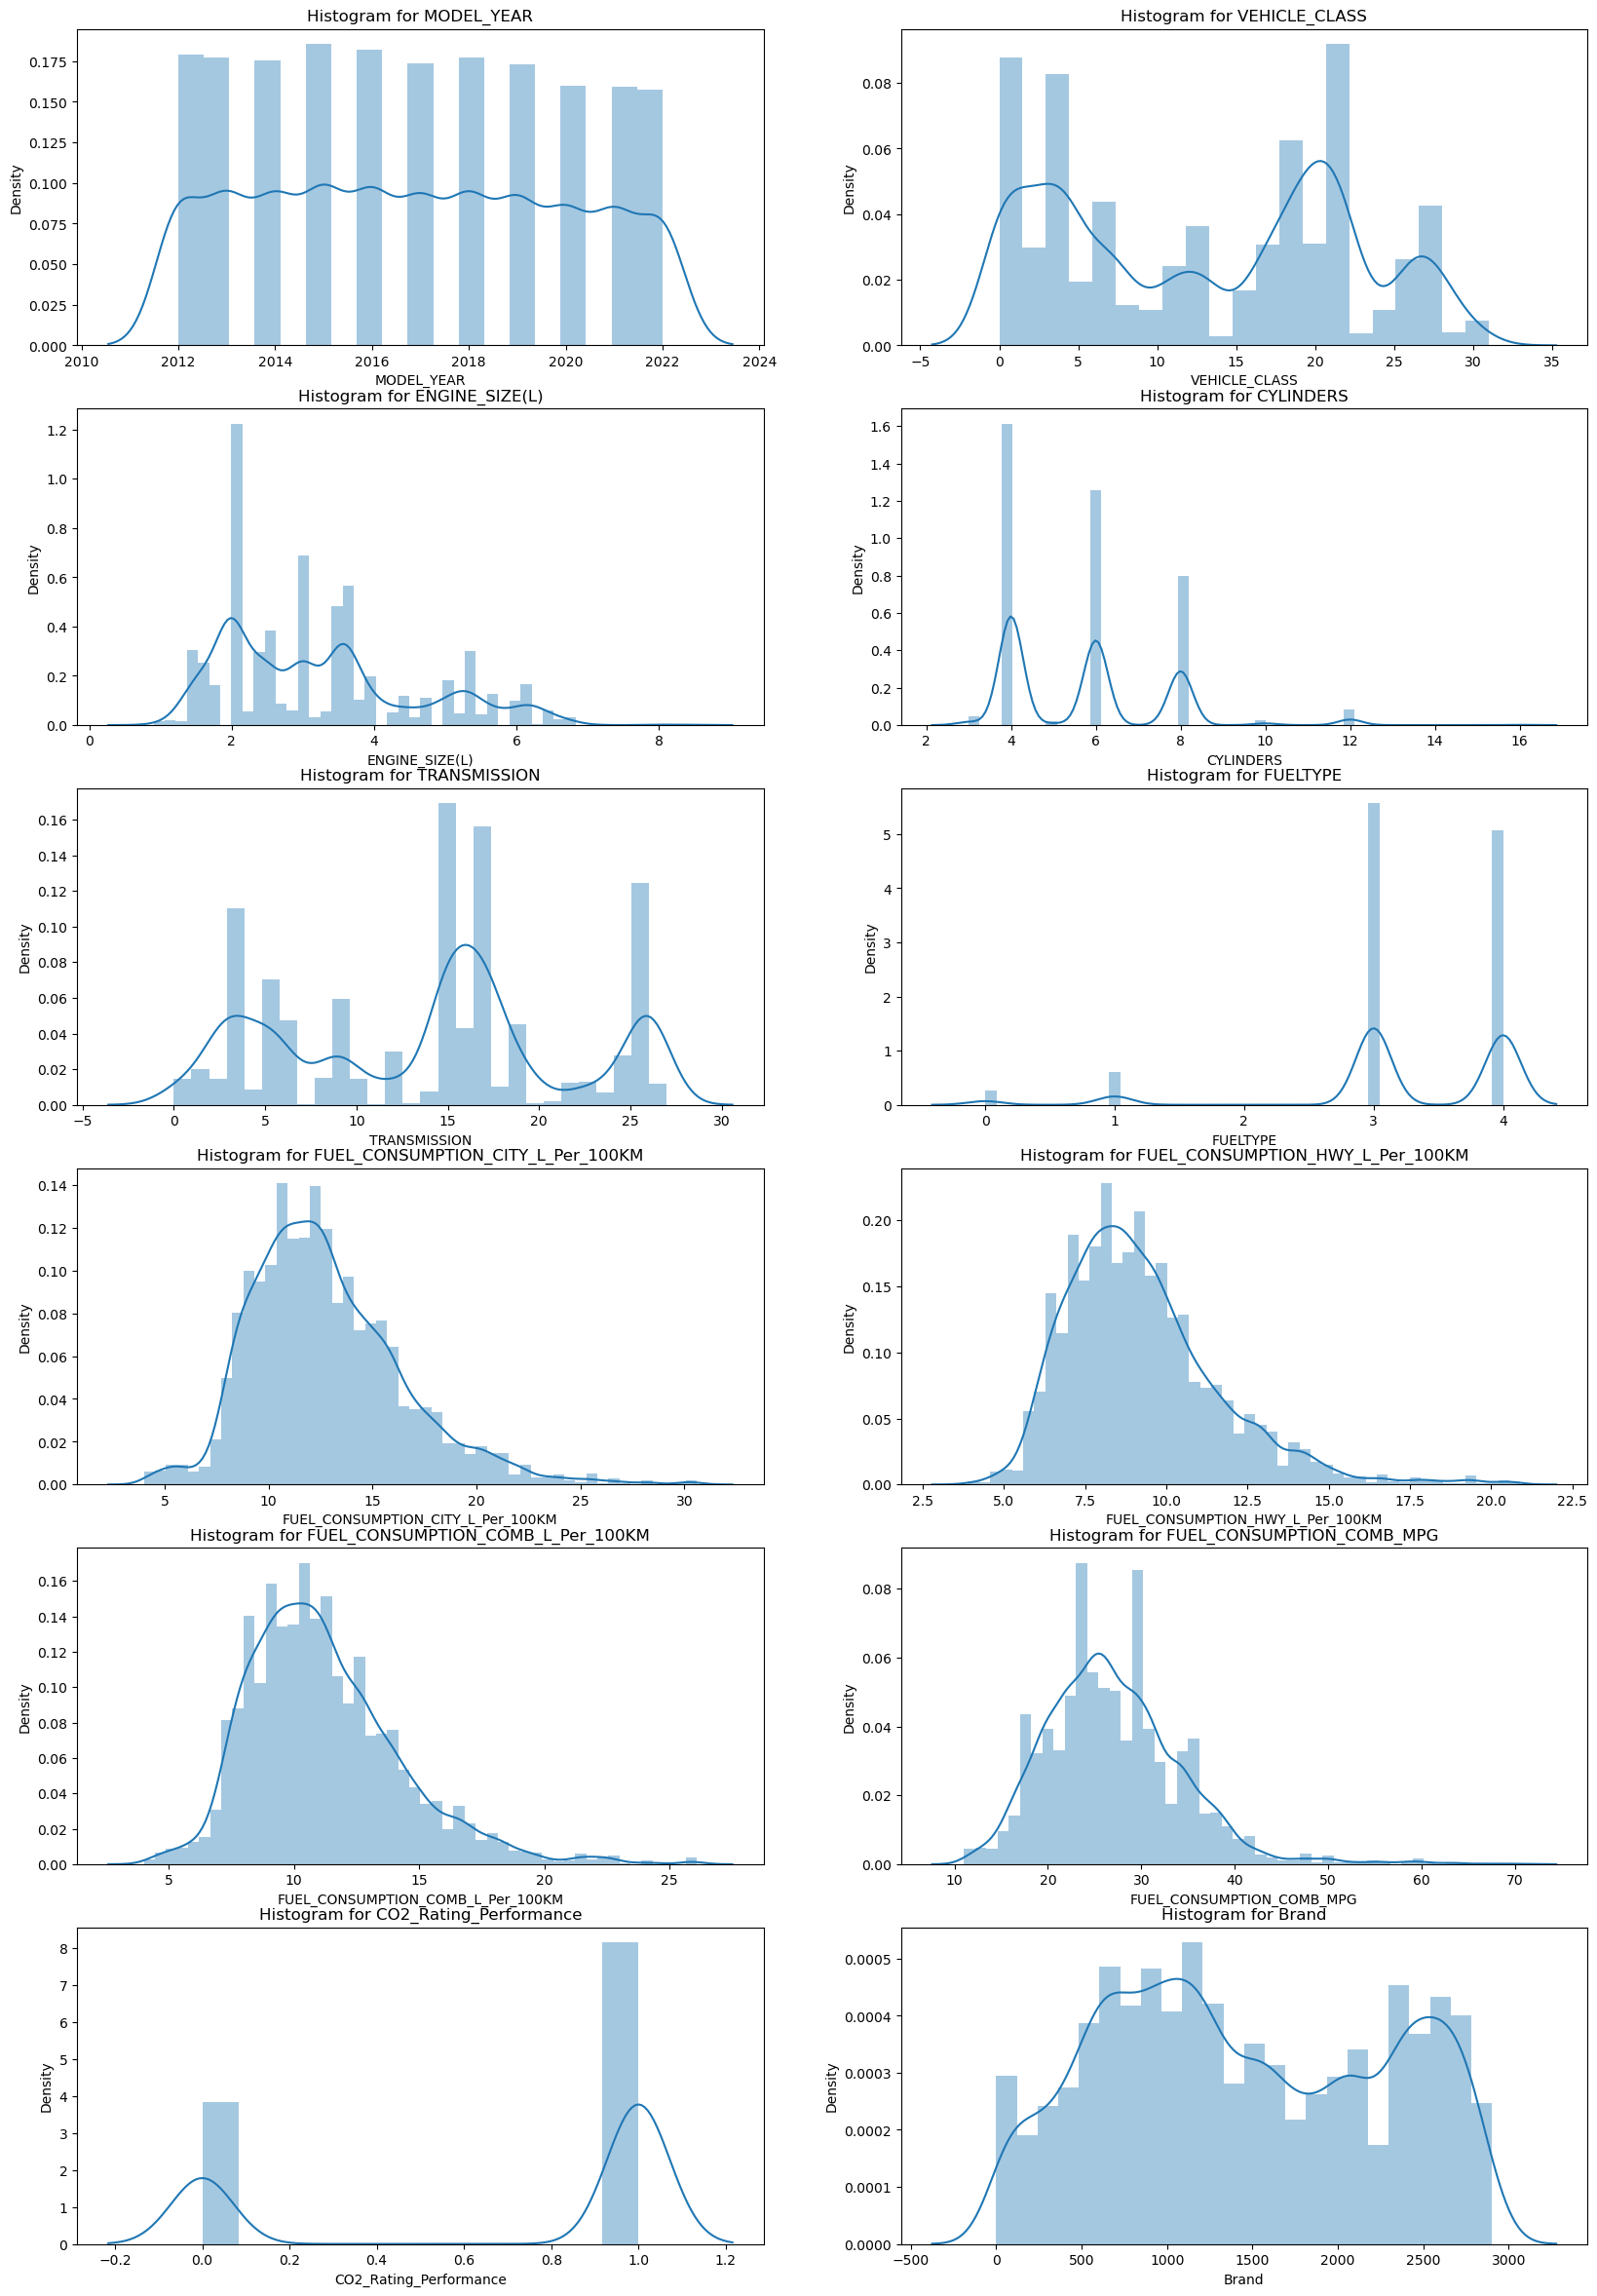

In [44]:
#Build bar graphs for categorical only and Distribution plot on numeric column

plot_data_distribution(df_CarPollution_F)


[Text(0, 0, '3716'), Text(0, 0, '7871')]

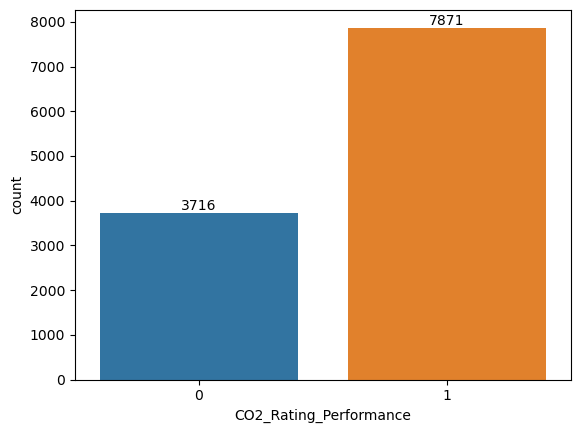

In [45]:
# Target column has unequal representation of classes.
# This is imbalaned class problem and the class of interest to find "1" is over represented. 
# That is good for us because model will be able to identify such cars and accuracy will be high.

ax = sns.countplot(x='CO2_Rating_Performance', data=df_CarPollution_F)
ax.bar_label(ax.containers[0])

# Multivariate Analysis

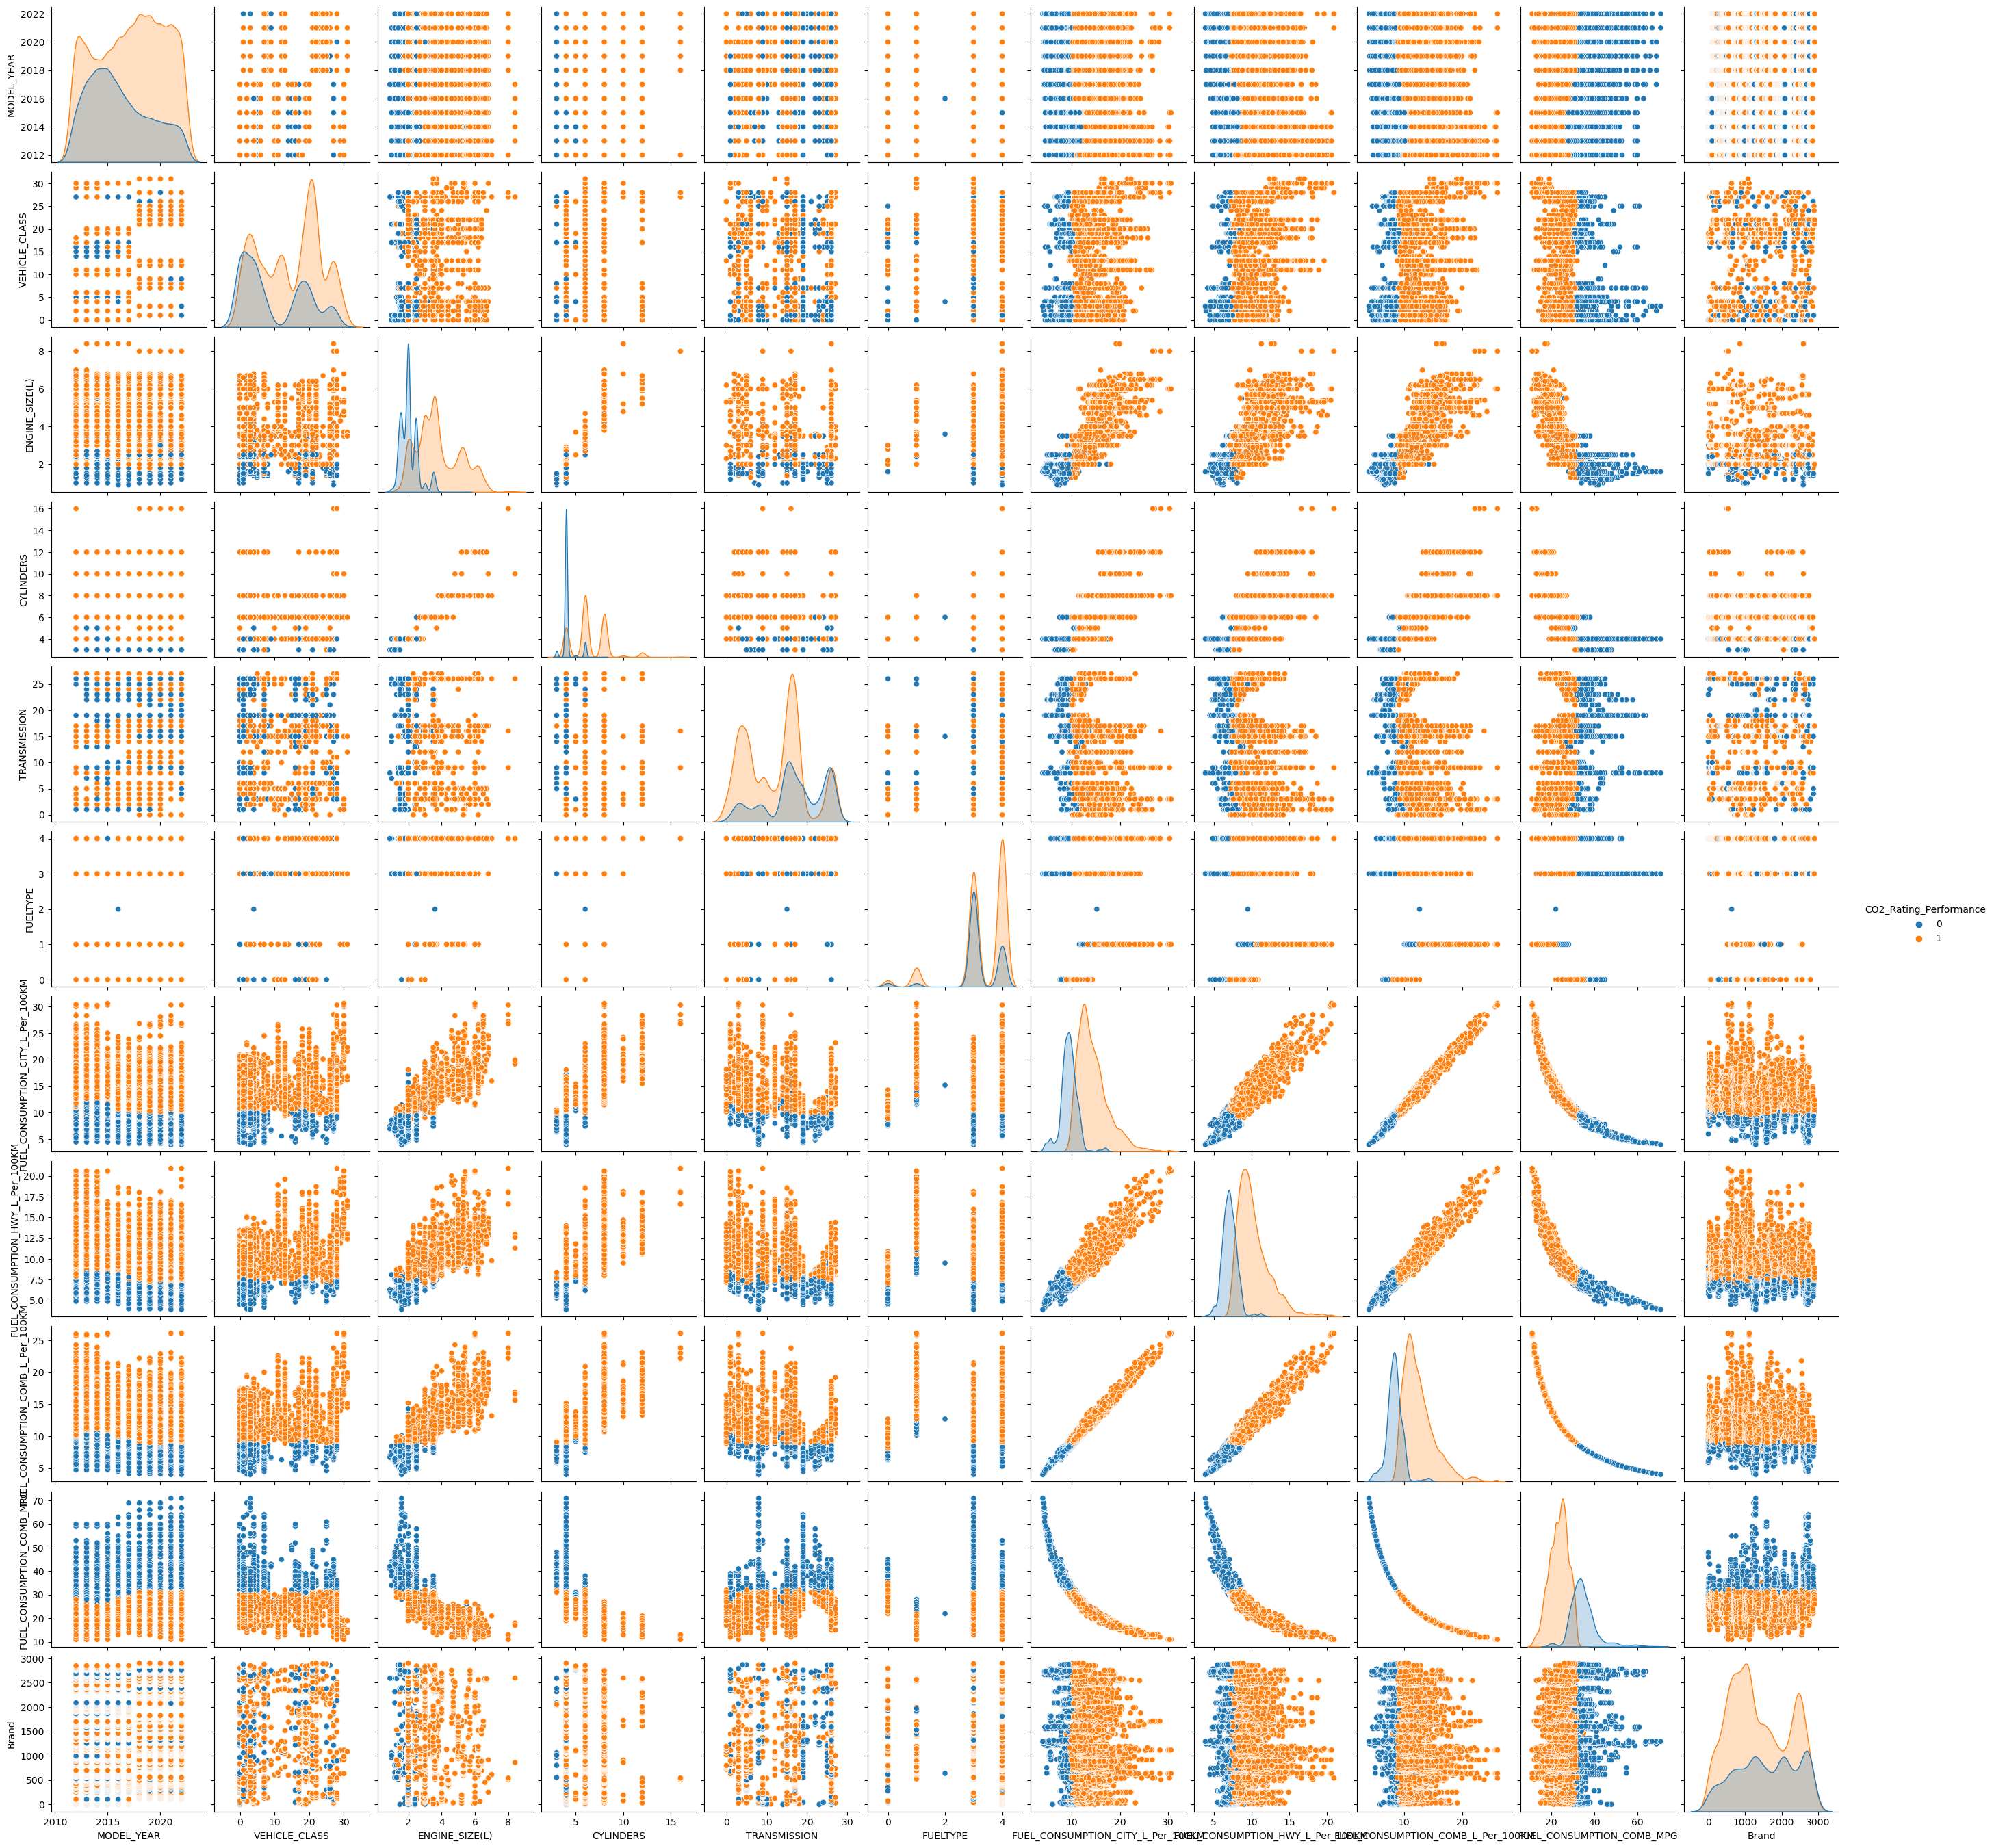

In [46]:
# pair plot using seaborn, which shows pairwise relationships between variables in dataframe

plot_pairplot(df_CarPollution_F, 'CO2_Rating_Performance')


In [47]:
#Correlation between attributes
dd_corr=df_CarPollution_F.corr()
dd_corr

MODEL_YEAR  VEHICLE_CLASS  ENGINE_SIZE(L)  \
MODEL_YEAR                           1.000000       0.180598       -0.070696   
VEHICLE_CLASS                        0.180598       1.000000        0.123383   
ENGINE_SIZE(L)                      -0.070696       0.123383        1.000000   
CYLINDERS                           -0.040525       0.102877        0.924931   
TRANSMISSION                        -0.015983      -0.137819       -0.333374   
FUELTYPE                             0.090968      -0.001974        0.038082   
FUEL_CONSUMPTION_CITY_L_Per_100KM   -0.117481       0.217120        0.826615   
FUEL_CONSUMPTION_HWY_L_Per_100KM    -0.065503       0.300544        0.759760   
FUEL_CONSUMPTION_COMB_L_Per_100KM   -0.100896       0.248634        0.812708   
FUEL_CONSUMPTION_COMB_MPG            0.078476      -0.244906       -0.759976   
CO2_Rating_Performance               0.156032       0.248757        0.587899   
Brand                                0.047671      -0.034153       -0.152145   

                                   CYLINDERS  TRANSMISSION  FUELTYPE  \
MODEL_YEAR                         -0.040525     -0.015983  0.090968   
VEHICLE_CLASS                       0.102877     -0.137819 -0.001974   
ENGINE_SIZE(L)                      0.924931     -0.333374  0.038082   
CYLINDERS                           1.000000     -0.289886  0.106339   
TRANSMISSION                       -0.289886      1.000000  0.217062   
FUELTYPE                            0.106339      0.217062  1.000000   
FUEL_CONSUMPTION_CITY_L_Per_100KM   0.800519     -0.362797 -0.104175   
FUEL_CONSUMPTION_HWY_L_Per_100KM    0.717866     -0.378729 -0.158614   
FUEL_CONSUMPTION_COMB_L_Per_100KM   0.780718     -0.372914 -0.124981   
FUEL_CONSUMPTION_COMB_MPG          -0.723688      0.345754  0.005977   
CO2_Rating_Performance              0.568979     -0.287213  0.079720   
Brand                              -0.162506      0.180992  0.055607   

                                   FUEL_CONSUMPTION_CITY_L_Per_100KM  \
MODEL_YEAR                                                 -0.117481   
VEHICLE_CLASS                                               0.217120   
ENGINE_SIZE(L)                                              0.826615   
CYLINDERS                                                   0.800519   
TRANSMISSION                                               -0.362797   
FUELTYPE                                                   -0.104175   
FUEL_CONSUMPTION_CITY_L_Per_100KM                           1.000000   
FUEL_CONSUMPTION_HWY_L_Per_100KM                            0.949087   
FUEL_CONSUMPTION_COMB_L_Per_100KM                           0.993788   
FUEL_CONSUMPTION_COMB_MPG                                  -0.920460   
CO2_Rating_Performance                                      0.632978   
Brand                                                      -0.201566   

                                   FUEL_CONSUMPTION_HWY_L_Per_100KM  \
MODEL_YEAR                                                -0.065503   
VEHICLE_CLASS                                              0.300544   
ENGINE_SIZE(L)                                             0.759760   
CYLINDERS                                                  0.717866   
TRANSMISSION                                              -0.378729   
FUELTYPE                                                  -0.158614   
FUEL_CONSUMPTION_CITY_L_Per_100KM                          0.949087   
FUEL_CONSUMPTION_HWY_L_Per_100KM                           1.000000   
FUEL_CONSUMPTION_COMB_L_Per_100KM                          0.977996   
FUEL_CONSUMPTION_COMB_MPG                                 -0.884505   
CO2_Rating_Performance                                     0.621363   
Brand                                                     -0.142819   

                                   FUEL_CONSUMPTION_COMB_L_Per_100KM  \
MODEL_YEAR                                                 -0.100896   
VEHICLE_CLASS                                       

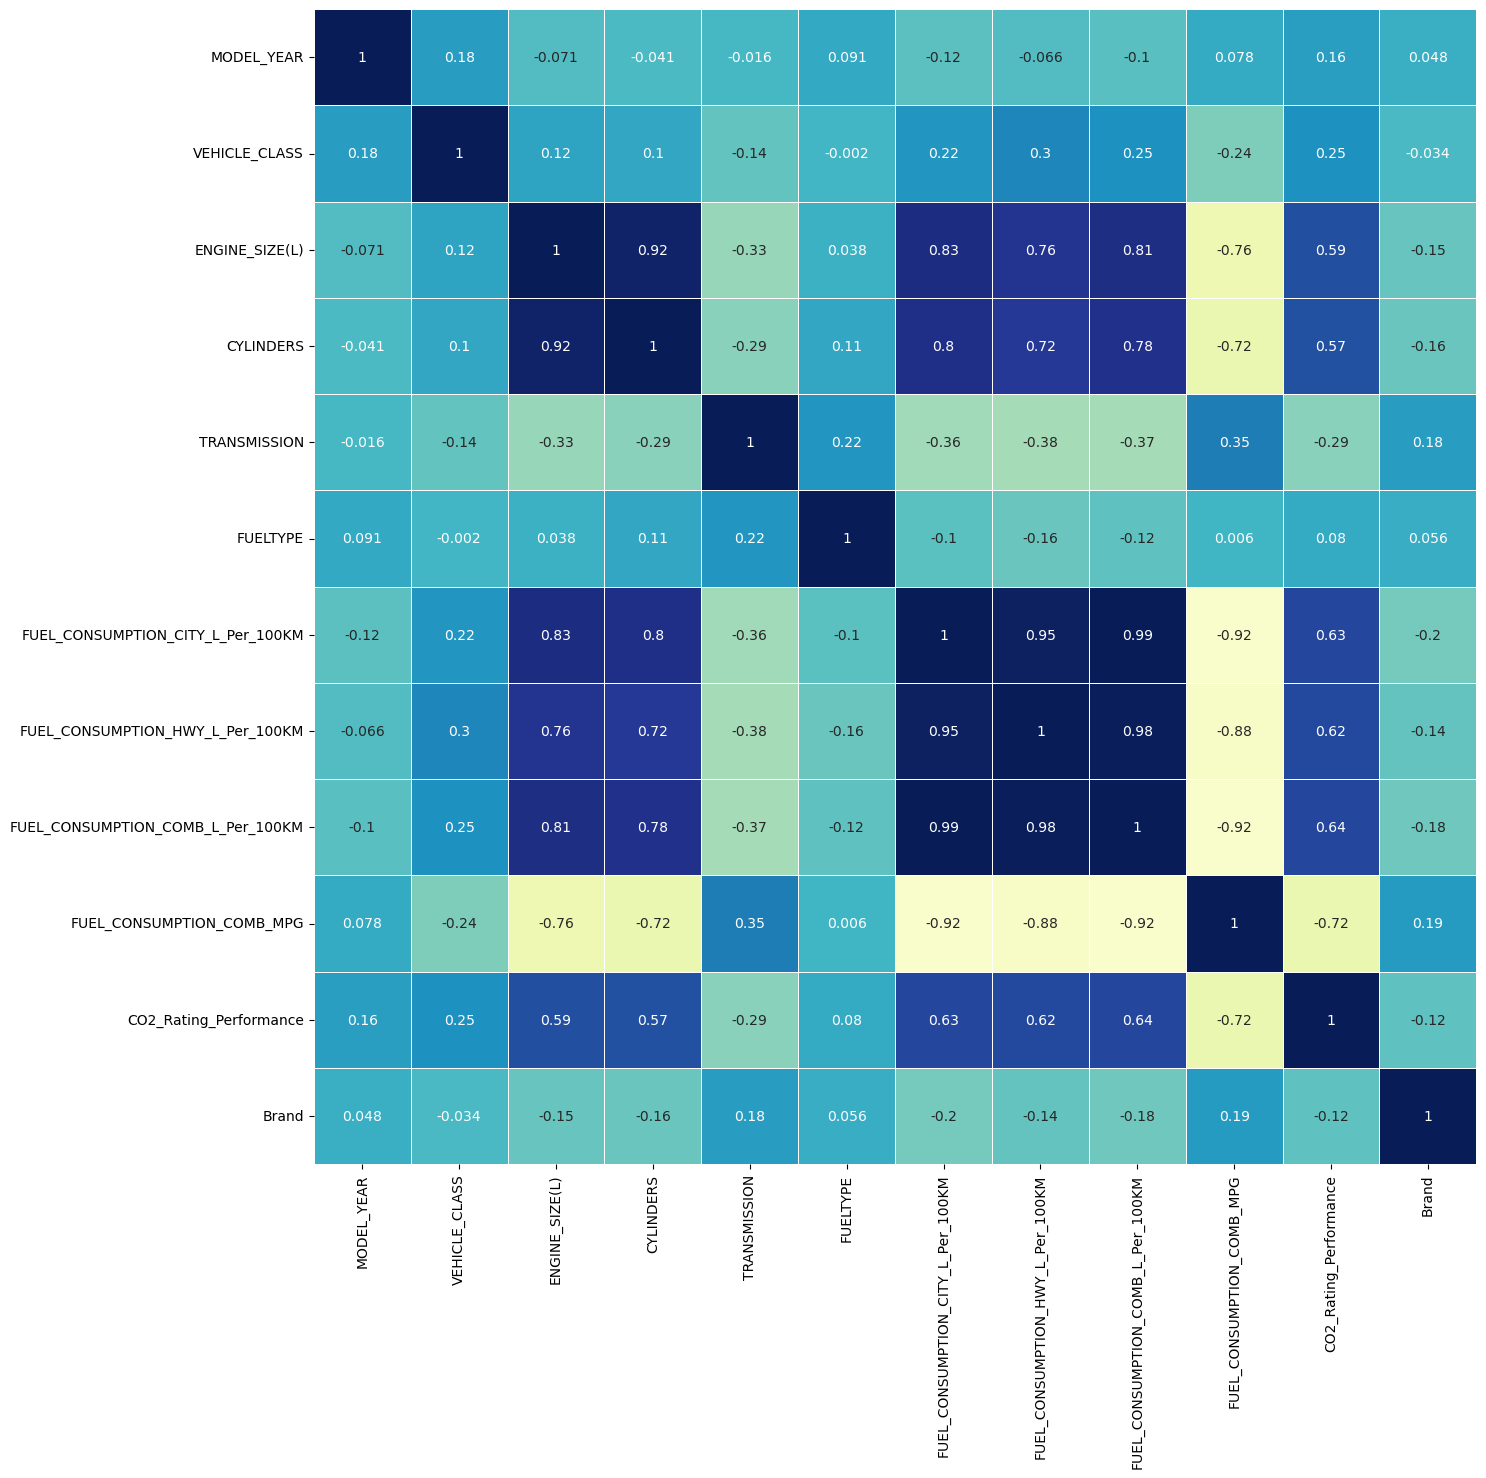

In [48]:
# heatmap of correlation
# create a correlation matrix
plot_correlation_heatmap(df_CarPollution_F)


In [49]:
# Based on the correlation map we could say that following fields have the largest correlation
# The ones with the highest correlation with the target column "CO2_Rating_Performance" will affect it the most

#These columns are the most significant columns while building Decision Tree
dd_corr[(dd_corr['CO2_Rating_Performance']>=0.5)|(dd_corr['CO2_Rating_Performance']<=-0.5)]['CO2_Rating_Performance']


ENGINE_SIZE(L)                       0.587899
CYLINDERS                            0.568979
FUEL_CONSUMPTION_CITY_L_Per_100KM    0.632978
FUEL_CONSUMPTION_HWY_L_Per_100KM     0.621363
FUEL_CONSUMPTION_COMB_L_Per_100KM    0.636136
FUEL_CONSUMPTION_COMB_MPG           -0.722532
CO2_Rating_Performance               1.000000
Name: CO2_Rating_Performance, dtype: float64

# Model Building

In [50]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = df_CarPollution_F.drop(labels= "CO2_Rating_Performance" , axis = 1)
y = df_CarPollution_F["CO2_Rating_Performance"]

In [51]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

MODEL_YEAR  VEHICLE_CLASS  ENGINE_SIZE(L)     CYLINDERS  \
count  1.158700e+04   1.158700e+04    1.158700e+04  1.158700e+04   
mean   1.580413e-13  -1.985121e-16    1.110530e-15 -2.660607e-15   
std    1.000043e+00   1.000043e+00    1.000043e+00  1.000043e+00   
min   -1.556004e+00  -1.419913e+00   -1.693733e+00 -1.444281e+00   
25%   -9.162090e-01  -9.855169e-01   -8.943206e-01 -9.087816e-01   
50%    4.348307e-02  -8.125946e-03   -1.675820e-01  1.622164e-01   
75%    1.003175e+00   8.606661e-01    4.138089e-01  1.622164e-01   
max    1.642970e+00   1.946656e+00    3.756806e+00  5.517206e+00   

       TRANSMISSION      FUELTYPE  FUEL_CONSUMPTION_CITY_L_Per_100KM  \
count  1.158700e+04  1.158700e+04                       1.158700e+04   
mean   1.739017e-15  3.434381e-15                       8.851027e-17   
std    1.000043e+00  1.000043e+00                       1.000043e+00   
min   -1.775830e+00 -3.677214e+00                      -2.380492e+00   
25%   -1.003113e+00 -2.987645e-01                      -7.041098e-01   
50%    1.559616e-01 -2.987645e-01                      -1.363029e-01   
75%    4.135338e-01  8.273852e-01                       5.396578e-01   
max    1.701395e+00  8.273852e-01                       4.811729e+00   

       FUEL_CONSUMPTION_HWY_L_Per_100KM  FUEL_CONSUMPTION_COMB_L_Per_100KM  \
count                      1.158700e+04                       1.158700e+04   
mean                       4.023660e-16                       3.082864e-16   
std                        1.000043e+00                       1.000043e+00   
min                       -2.239341e+00                      -2.344128e+00   
25%                       -6.938128e-01                      -6.859521e-01   
50%                       -1.507895e-01                      -1.657399e-01   
75%                        4.757758e-01                       5.170386e-01   
max                        4.861733e+00                       4.841302e+00   

       FUEL_CONSUMPTION_COMB_MPG         Brand  
count               1.158700e+04  1.158700e+04  
mean                5.018305e-16 -4.960983e-16  
std                 1.000043e+00  1.000043e+00  
min                -2.184914e+00 -1.784222e+00  
25%                -6.852527e-01 -8.348624e-01  
50%                -1.399214e-01 -1.474375e-01  
75%                 5.417426e-01  8.984566e-01  
max                 5.995055e+00  1.784484e+00

In [52]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30,random_state=99, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=99, stratify=y)

# Logistic Regression

In [53]:
#Build the logistic regression model
logisticRegr = LogisticRegression()

In [54]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [55]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9496692551049756


In [56]:
#Predict for test set
pred_test = logisticRegr.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1022   93]
 [  82 2280]]


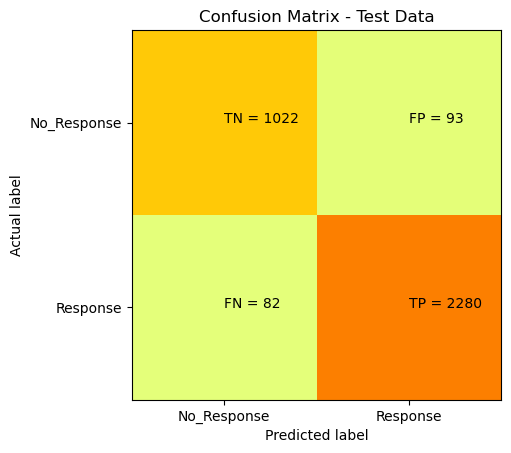

In [57]:
# confusion_matrix

plot_confusion_matrix(y_test, pred_test)

In [58]:
#calculate F1 score, precision and recall
f1=f1_score(y_test,pred_test)
recall=recall_score(y_test,pred_test)
precision=precision_score(y_test,pred_test)

In [59]:
# Storing the result
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': score, 'F1 Score':f1, 'Precision':precision, 'Recall':recall})

In [60]:
resultsDf

Method  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.949669  0.963041   0.960809  0.965284

# Decision Tree Model

In [61]:
#Finding optimum number of estimators using gridsearch
# Define the parameter grid
param_grid = {
    'max_depth': range(1, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : range(1, 5)
}
# Initialize the model
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1}
Best score:  0.993341781467155


In [62]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option
# could be gini index.
# Pruning decision tree by restricting the depth of the tree to 5 and size of the leaf node to 5

decisionTree_entropy=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=1)

In [63]:
decisionTree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [64]:
decisionTree_entropy.score(X_train, y_train)  # performance on train data

0.9995067817509248

In [65]:
score = decisionTree_entropy.score(X_test, y_test)  # performance on test data
score

0.9962611446649411

MODEL_YEAR 0.20093012905414204
VEHICLE_CLASS 0.007100564934972644
ENGINE_SIZE(L) 0.013148966841661891
CYLINDERS 0.0
TRANSMISSION 0.003157796050363695
FUELTYPE 0.013600828648728316
FUEL_CONSUMPTION_CITY_L_Per_100KM 0.0066827048579388764
FUEL_CONSUMPTION_HWY_L_Per_100KM 0.006348017390258609
FUEL_CONSUMPTION_COMB_L_Per_100KM 0.6627373843249819
FUEL_CONSUMPTION_COMB_MPG 0.0840976651599953
Brand 0.002195942736956725


Text(0.5, 1.0, 'Significant Features - Decision Tree Model')

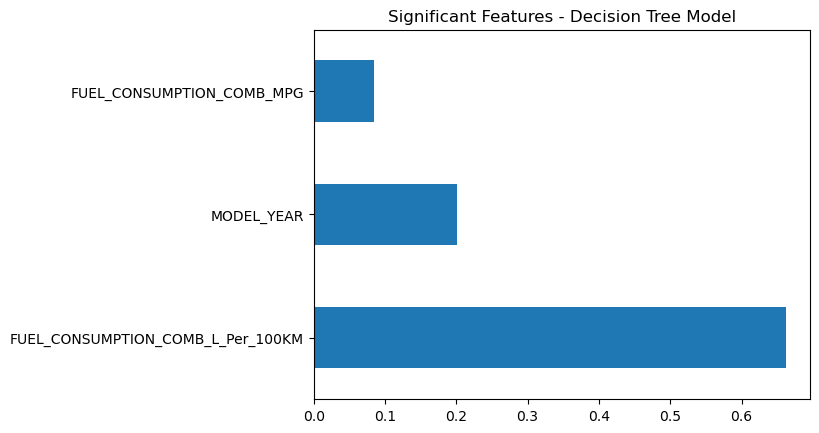

In [66]:
#significant features
features = list(X_train.columns)
for name, importance in zip(features, decisionTree_entropy.feature_importances_):
    print(name, importance)
#impt features
(pd.Series(decisionTree_entropy.feature_importances_, index=X.columns)
   .nlargest(3)
   .plot(kind='barh'))
plt.title("Significant Features - Decision Tree Model")

In [67]:
#Predict for test set
pred_test = decisionTree_entropy.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1108    7]
 [   6 2356]]


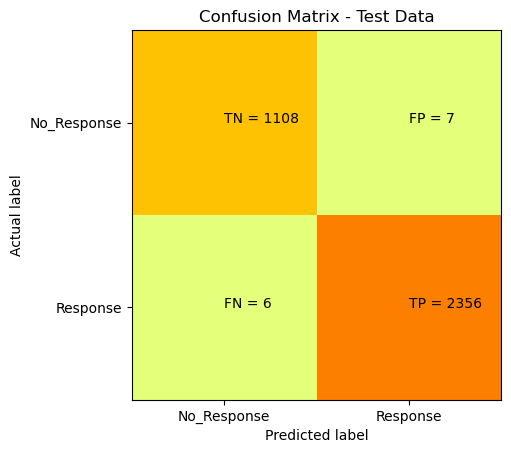

In [68]:
# confusion_matrix

plot_confusion_matrix(y_test, pred_test)

In [69]:
#calculate F1 score, precision and recall
f1=f1_score(y_test,pred_test)
recall=recall_score(y_test,pred_test)
precision=precision_score(y_test,pred_test)

In [70]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': [score],'F1 Score':f1,'Precision':precision, 'Recall':recall})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.949669  0.963041   0.960809  0.965284
0        Decision Tree  0.996261  0.997249   0.997038  0.997460

# Randon Forest Model

# Random Search to find best hyper parameters for Random Forest

In [71]:
randomForest = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=10)

In [72]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [73]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(randomForest, param_distributions=param_dist, n_iter=samples)

In [74]:
randomCV.fit(X_train, y_train)

print(randomCV.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [75]:
randomForest = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=10,
                                      bootstrap=False, criterion='gini', min_samples_leaf= 2, min_samples_split= 6)

In [76]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=50, random_state=1)

In [77]:
randomForest.score(X_train, y_train)  # performance on train data

0.998766954377312

In [78]:
score = randomForest.score(X_test, y_test)  # performance on test data
score

0.996836353178027

MODEL_YEAR 0.19703434646924917
VEHICLE_CLASS 0.009795461443335965
ENGINE_SIZE(L) 0.012376210525339472
CYLINDERS 0.00016545980258502138
TRANSMISSION 0.0021531956792968186
FUELTYPE 0.015570222010715375
FUEL_CONSUMPTION_CITY_L_Per_100KM 0.004983667039363606
FUEL_CONSUMPTION_HWY_L_Per_100KM 0.00765421432588496
FUEL_CONSUMPTION_COMB_L_Per_100KM 0.6324767840762976
FUEL_CONSUMPTION_COMB_MPG 0.11524028118752079
Brand 0.0025501574404111983


Text(0.5, 1.0, 'Significant Features - Random Forest Model')

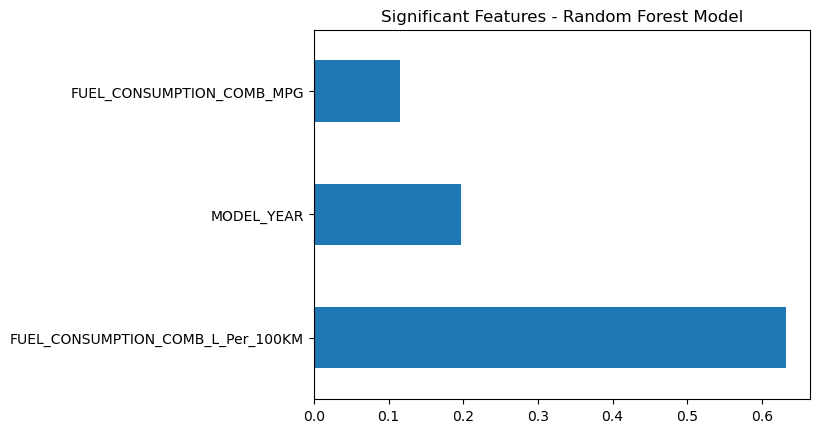

In [79]:
#significant features
features = list(X_train.columns)
for name, importance in zip(features, randomForest.feature_importances_):
    print(name, importance)

#impt features
(pd.Series(randomForest.feature_importances_, index=X.columns)
   .nlargest(3)
   .plot(kind='barh'))
plt.title("Significant Features - Random Forest Model")

In [80]:
#Predict for test set
pred_test = randomForest.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1109    6]
 [   5 2357]]


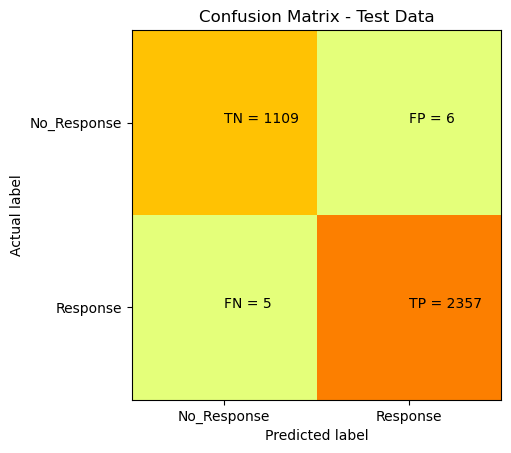

In [81]:
# confusion_matrix

plot_confusion_matrix(y_test, pred_test)

In [82]:
#calculate F1 score, precision and recall
f1=f1_score(y_test,pred_test)
recall=recall_score(y_test,pred_test)
precision=precision_score(y_test,pred_test)

In [83]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': [score],'F1 Score':f1,'Precision':precision, 'Recall':recall})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.949669  0.963041   0.960809  0.965284
0        Decision Tree  0.996261  0.997249   0.997038  0.997460
0        Random Forest  0.996836  0.997672   0.997461  0.997883

# Gradient Boost

In [84]:
# Define the Gradient Boosting model
gb = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': range(1,30),
    'max_depth': [1,2,3],
}

# Create a GridSearchCV object for performing the hyperparameter tuning
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 3, 'n_estimators': 29}
Best cross-validation score: 0.9768187422934649


In [85]:
gradient_Boosting = GradientBoostingClassifier(n_estimators = 29,random_state=1, max_depth=3)
gradient_Boosting.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=29, random_state=1)

In [86]:
gradient_Boosting.score(X_train, y_train)  # performance on train data

0.9800246609124538

In [87]:
score = gradient_Boosting.score(X_test, y_test)  # performance on test data
score

0.9784296807592753

MODEL_YEAR 0.18394180210026534
VEHICLE_CLASS 0.003653624441454703
ENGINE_SIZE(L) 0.0077416122739683724
CYLINDERS 2.9499477903589467e-05
TRANSMISSION 0.0004528021183453967
FUELTYPE 0.009413706236033517
FUEL_CONSUMPTION_CITY_L_Per_100KM 0.004907829369273093
FUEL_CONSUMPTION_HWY_L_Per_100KM 0.022217643565281893
FUEL_CONSUMPTION_COMB_L_Per_100KM 0.6935999003346615
FUEL_CONSUMPTION_COMB_MPG 0.07371619746586187
Brand 0.0003253826169508246


Text(0.5, 1.0, 'Significant Features - Gradient Boost Model')

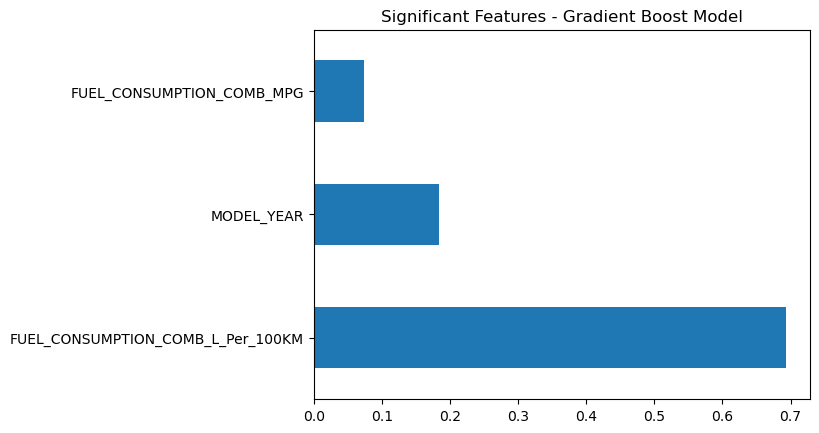

In [88]:
#significant features
features = list(X_train.columns)
for name, importance in zip(features, gradient_Boosting.feature_importances_):
    print(name, importance)

#impt features
(pd.Series(gradient_Boosting.feature_importances_, index=X.columns)
   .nlargest(3)
   .plot(kind='barh'))
plt.title("Significant Features - Gradient Boost Model")

In [89]:
#Predict for test set
pred_test = randomForest.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1109    6]
 [   5 2357]]


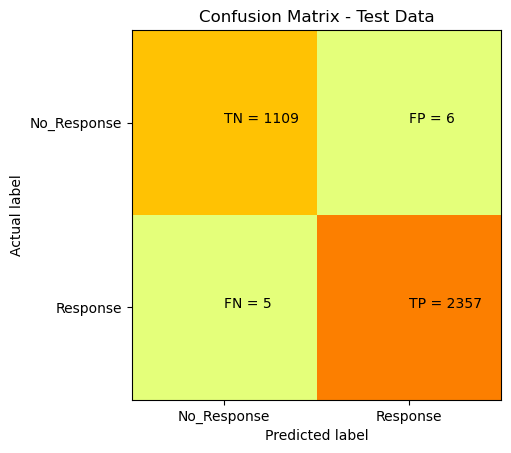

In [90]:
# confusion_matrix

plot_confusion_matrix(y_test, pred_test)

In [91]:
#calculate F1 score, precision and recall
f1=f1_score(y_test,pred_test)
recall=recall_score(y_test,pred_test)
precision=precision_score(y_test,pred_test)

In [92]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'Accuracy': [score],'F1 Score':f1,'Precision':precision, 'Recall':recall})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.949669  0.963041   0.960809  0.965284
0        Decision Tree  0.996261  0.997249   0.997038  0.997460
0        Random Forest  0.996836  0.997672   0.997461  0.997883
0       Gradient Boost  0.978430  0.997672   0.997461  0.997883

# Build kNN Model

# Finding optimal value of hyper parameter K

In [93]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
# because we need to take voting in kNN, therefore K values should be odd
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [94]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


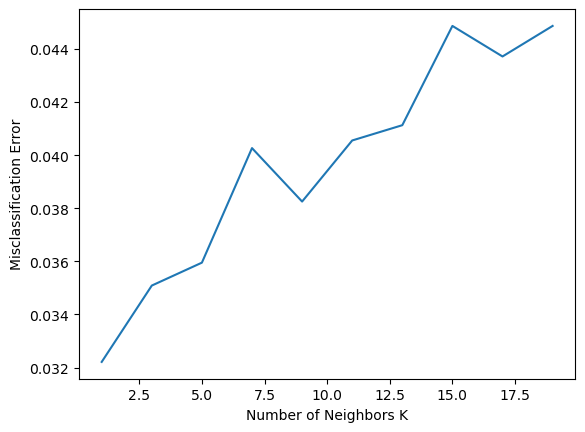

In [95]:
#From thr graph we could see that the best model is obtained when value of K is 3.
# for these values the number of missclassifications are least.
# therefore, we will use value of k as 3 for our final model


import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Best model with K = 3

In [96]:
KNN_3 = KNeighborsClassifier(n_neighbors= 3)

# Call Nearest Neighbour algorithm
KNN_3.fit(X_train, y_train)

# For every test data point, predict it's label based on 
# 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

#Predict for test set
pred_test = KNN_3.predict(X_test)
KNN_3.score(X_test, y_test)

0.9649122807017544

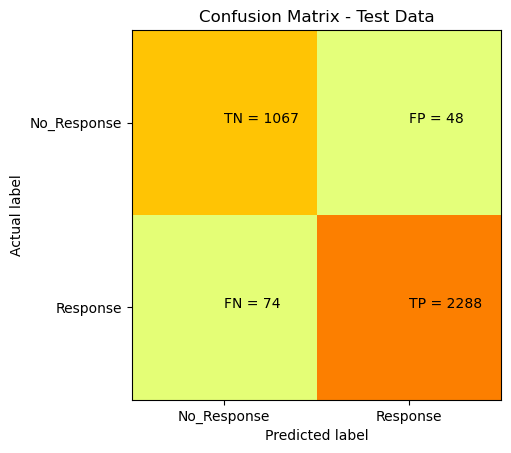

In [97]:
# confusion_matrix

plot_confusion_matrix(y_test, pred_test)

In [98]:
#calculate F1 score, precision and recall
f1=f1_score(y_test,pred_test)
recall=recall_score(y_test,pred_test)
precision=precision_score(y_test,pred_test)

In [99]:
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'Accuracy': [score],'F1 Score':f1,'Precision':precision, 'Recall':recall})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.949669  0.963041   0.960809  0.965284
0        Decision Tree  0.996261  0.997249   0.997038  0.997460
0        Random Forest  0.996836  0.997672   0.997461  0.997883
0       Gradient Boost  0.978430  0.997672   0.997461  0.997883
0                  KNN  0.978430  0.974032   0.979452  0.968671

# Build NN Model - SGD Solver

In [100]:
model_NN= MLPClassifier(100,solver='sgd',learning_rate_init=0.001,max_iter=15000,
                        activation='relu',batch_size=125)
model_NN.fit(X_train, y_train)
model_NN.score(X_test,y_test)

0.9591601955708945

In [101]:
score = model_NN.score(X_test, y_test)  # performance on test data
predicted_labels = model_NN.predict(X_test)
score

0.9591601955708945

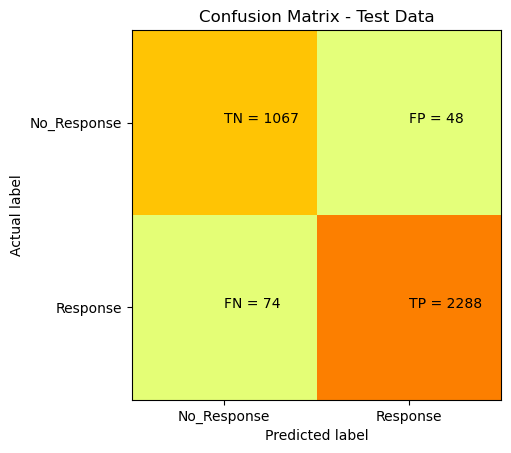

In [102]:
# confusion_matrix

plot_confusion_matrix(y_test, pred_test)

In [103]:
#calculate F1 score, precision and recall
f1=f1_score(y_test,pred_test)
recall=recall_score(y_test,pred_test)
precision=precision_score(y_test,pred_test)

In [104]:
tempResultsDf = pd.DataFrame({'Method':['Neural Network'], 'Accuracy': [score],'F1 Score':f1,'Precision':precision, 'Recall':recall})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.949669  0.963041   0.960809  0.965284
0        Decision Tree  0.996261  0.997249   0.997038  0.997460
0        Random Forest  0.996836  0.997672   0.997461  0.997883
0       Gradient Boost  0.978430  0.997672   0.997461  0.997883
0                  KNN  0.978430  0.974032   0.979452  0.968671
0       Neural Network  0.959160  0.974032   0.979452  0.968671

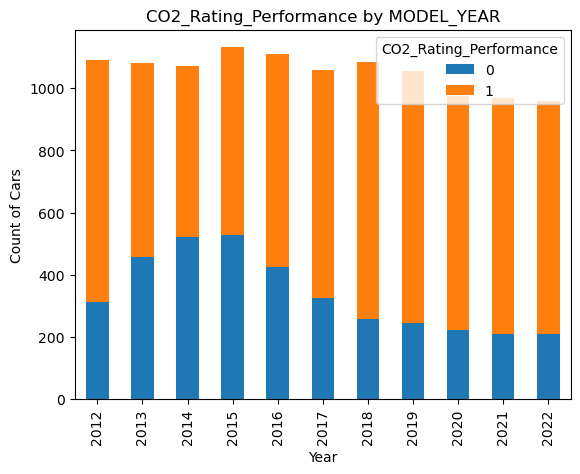

In [105]:


# Create a dataframe with counts of CO2_Rating_Performance for each MODEL_YEAR value
co2_counts = df_CarPollution_F.groupby(['MODEL_YEAR', 'CO2_Rating_Performance'])['CO2_Rating_Performance'].count().unstack()

# Create a bar plot with stacked bars
ax = co2_counts.plot(kind='bar', stacked=True)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Count of Cars')

# Set the title of the plot
ax.set_title('CO2_Rating_Performance by MODEL_YEAR')

# Show the plot
plt.show()

# Two-sample t-test

In [106]:
# Two-sample t-test:determine if the mean fuel consumption of two different vehicle models are significantly different from each other

# Create two samples of fuel consumption for two different vehicle models
sample1 = df_CarPollution.loc[df_CarPollution['MAKE'] == 'FORD', 'FUEL_CONSUMPTION_COMB_L_Per_100KM']
sample2 = df_CarPollution.loc[df_CarPollution['MAKE'] == 'HONDA', 'FUEL_CONSUMPTION_COMB_L_Per_100KM']

# Conduct a two-sample t-test assuming equal variances
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=True)

# Print the results of the t-test
print(f'The t-statistic is {t_stat:.2f} and the p-value is {p_value:.4f}.')
if p_value < 0.05:
    print('There is a significant difference in mean fuel consumption between the two vehicle models.')
else:
    print('There is no significant difference in mean fuel consumption between the two vehicle models.')

The t-statistic is 12.15 and the p-value is 0.0000.
There is a significant difference in mean fuel consumption between the two vehicle models.


# Chi-Square Test

In [114]:

# Determine if there is a significant association between vehicle transmission type and vehicle class

# Create a contingency table of transmission type and vehicle class
contingency_table = pd.crosstab(df_CarPollution['TRANSMISSION'], df_CarPollution['VEHICLE_CLASS'])

# Conduct a chi-square test to determine if there is a significant association between transmission type and vehicle class
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print('Chi-square test results:')
print(f'Chi-square statistic: {chi2_stat:.2f}')
print(f'p-value: {p_value:.4f}')
if p_value < 0.05:
    print('There is a significant association between transmission type and vehicle class.')
else:
    print('There is no significant association between transmission type and vehicle class.')

Chi-square test results:
Chi-square statistic: 22643.81
p-value: 0.0000
There is a significant association between transmission type and vehicle class.


In [115]:
#determine if there is a significant association between vehicle make and fuel type

# Create a contingency table
contingency_table = pd.crosstab(df_CarPollution['MAKE'], df_CarPollution['FUELTYPE'])

# Conduct the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results of the test
print(f'The chi-square statistic is {chi2:.2f} with {dof} degrees of freedom and a p-value of {p:.4f}.')
if p < 0.05:
    print('There is a significant association between vehicle make and fuel type.')
else:
    print('There is no significant association between vehicle make and fuel type.')

The chi-square statistic is 10171.33 with 308 degrees of freedom and a p-value of 0.0000.
There is a significant association between vehicle make and fuel type.


# ANOVA Test

In [124]:
# determine if there is a significant difference in fuel consumption ratings across different vehicle classes

subcompact = df_CarPollution.loc[df_CarPollution['VEHICLE_CLASS'] == 'SUV', 'FUEL_CONSUMPTION_COMB_L_Per_100KM']
compact = df_CarPollution.loc[df_CarPollution['VEHICLE_CLASS'] == 'COMPACT', 'FUEL_CONSUMPTION_COMB_L_Per_100KM']
midsize = df_CarPollution.loc[df_CarPollution['VEHICLE_CLASS'] == 'MID-SIZE', 'FUEL_CONSUMPTION_COMB_L_Per_100KM']
fullsize = df_CarPollution.loc[df_CarPollution['VEHICLE_CLASS'] == 'FULL-SIZE', 'FUEL_CONSUMPTION_COMB_L_Per_100KM']

# Conduct one-way ANOVA test
f_stat, p_val = stats.f_oneway(subcompact, compact, midsize, fullsize)

# Print the results
print(f"The F-statistic is {f_stat:.2f} with a p-value of {p_val:.4f}.")
if p_val < 0.05:
    print("There is a significant difference in mean fuel consumption ratings across different vehicle types.")
else:
    print("There is no significant difference in mean fuel consumption ratings across different vehicle types.")

The F-statistic is 220.24 with a p-value of 0.0000.
There is a significant difference in mean fuel consumption ratings across different vehicle types.


In [129]:
# determine if there is a significant difference in the mean fuel consumption ratings across different makes and model years.

# Fit a two-way ANOVA model with interaction term
model = ols('FUEL_CONSUMPTION_COMB_L_Per_100KM ~ MAKE * MODEL_YEAR', data=df_CarPollution).fit()

# Perform ANOVA analysis
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df           F        PR(>F)
MAKE             41659.650799     77.0   94.820515  0.000000e+00
MODEL_YEAR        1046.891533      1.0  183.475931  1.763097e-41
MAKE:MODEL_YEAR   2677.604075     77.0    6.094429  3.734367e-56
Residual         65235.319167  11433.0         NaN           NaN


C:\Users\davod\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 77, but rank is 75
  warnings.warn('covariance of constraints does not have full '


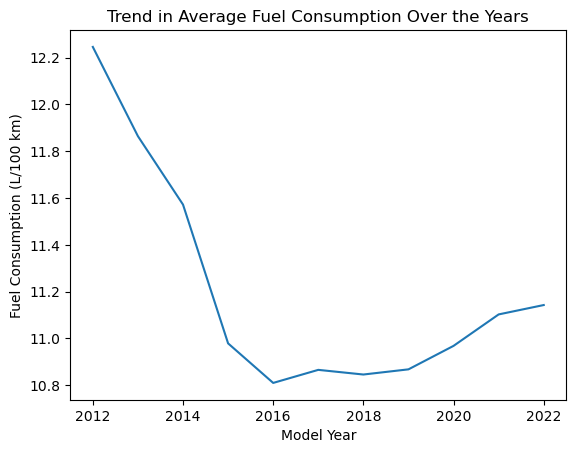

In [131]:
# Trend in average fuel consumption over the years:

# Compute the mean fuel consumption for each year
fuel_means = df_CarPollution_F.groupby('MODEL_YEAR')['FUEL_CONSUMPTION_COMB_L_Per_100KM'].mean()

# Plot the trend in fuel consumption over the years
fuel_means.plot()
plt.xlabel('Model Year')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.title('Trend in Average Fuel Consumption Over the Years')
plt.show()

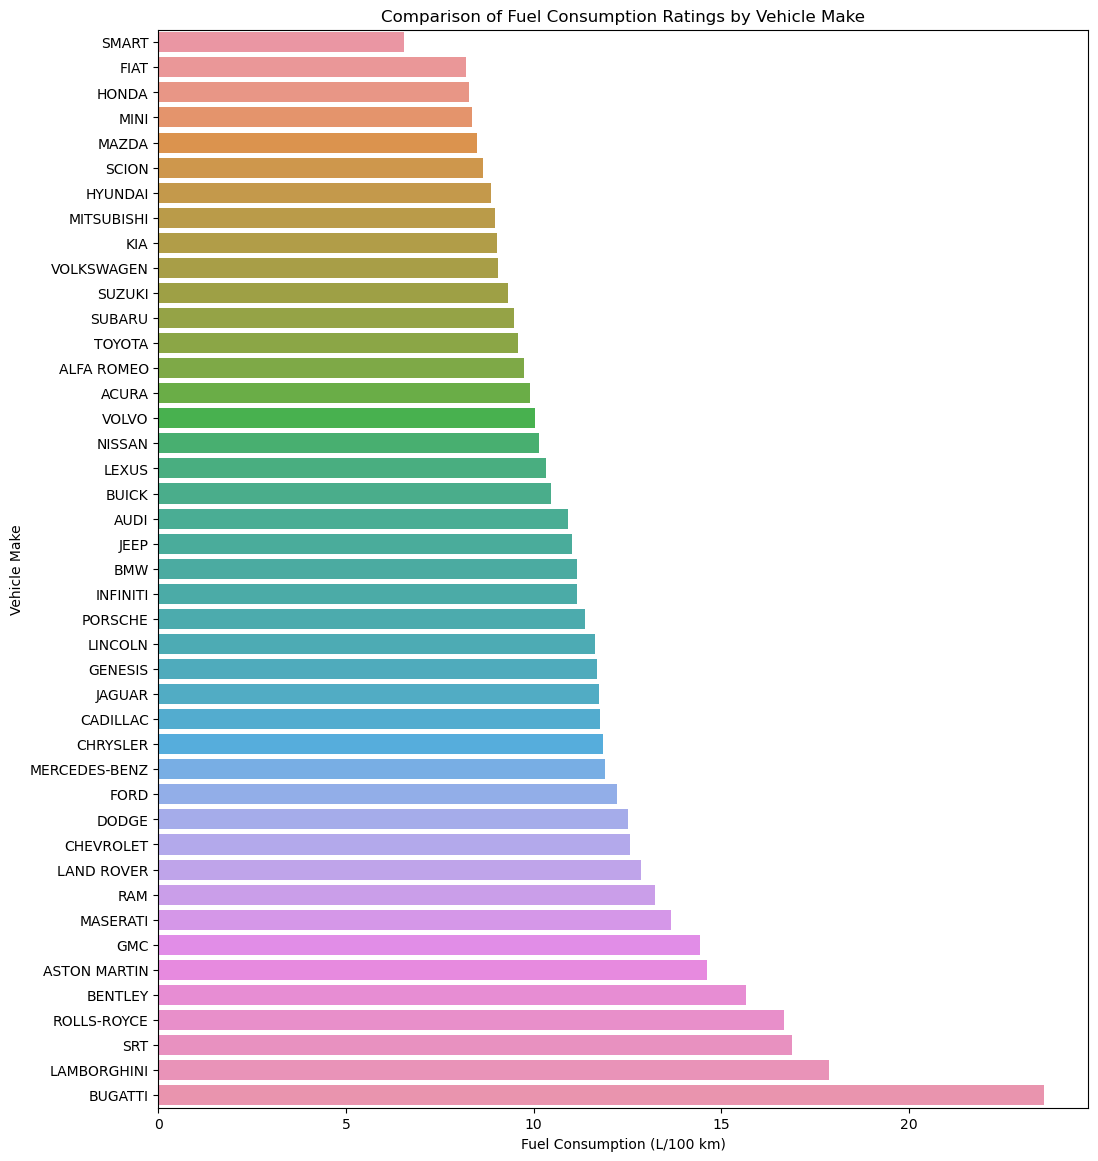

In [133]:
# Comparison of fuel consumption ratings between different vehicle makes:

# Compute the mean fuel consumption ratings by vehicle make

plt.figure(figsize=(12,14))

# Change values to uppercase
df_CarPollution['MAKE'] = df_CarPollution['MAKE'].str.upper()
fuel_means = df_CarPollution.groupby('MAKE')[['FUEL_CONSUMPTION_COMB_L_Per_100KM']].mean()

# sort Make by mean of FUEL_CONSUMPTION_COMB_L_Per_100KM columns
fuel_means = fuel_means.sort_values(by = 'FUEL_CONSUMPTION_COMB_L_Per_100KM', ascending=True)

# Plot the mean fuel consumption ratings by vehicle make
sns.barplot(x='FUEL_CONSUMPTION_COMB_L_Per_100KM', y='MAKE', data=fuel_means.reset_index())
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('Vehicle Make')
plt.title('Comparison of Fuel Consumption Ratings by Vehicle Make')
plt.show()